In [44]:
# import packages
import glob
from pathlib import Path
import scipy.stats
import os
import numpy as np
from datetime import datetime
from datetime import timedelta
import pandas as pd
import calendar
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import cartopy.crs as ccrs
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from pathos.threading import ThreadPool as Pool
from scipy.stats import gaussian_kde
import xarray as xr
from matplotlib import cm
from textwrap import wrap
import matplotlib
from collections import Counter

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from f_sr_calculation import *

In [4]:
# work_dir=Path("/scratch/fransjevanoors/global_sr")
work_dir=Path("/mnt/u/LSM root zone/global_sr")
fig_dir=Path('/mnt/c/Users/fransjevanoors/surfdrive/Fransje/global_SR/irrigation_paper/figures')

In [5]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [6]:
#colors
a = 255/255
b = 220/255
c = 201/255
d = 133/255
e = 85/255
f = 70/255
g = 46/255

c1 = (e,0,0)
c2 = (c,0,0)
c3 = (a,g,0)
c4 = (a,d,0)
c5 = (a,b,0)
c6 = (a,a,f)
c7 = (f,a,a)
c8 = (0,b,a)
c9 = (0,d,a)
c10 = (0,g,a)
c11 = (0,0,c)
c12 = (0,0,e)

colors=[c12,c11,c10,c9,c8,c7,c6,c5,c4,c3,c2,c1]
cm_col = ListedColormap(colors)

In [7]:
c1 = '#4059AD'
c2 = '#6B9AC4'
c3 = '#F4B942'
c4 = '#97D8C4'

c1 = '#D81B60'
c2 = '#1E88E5'
c3 = '#FFC107'

In [8]:
from matplotlib.colors import LinearSegmentedColormap
colors2 =['white','white','white']
cmap_white = LinearSegmentedColormap.from_list('cm',colors2, N=3)
colors =['gainsboro','none']
cmap_grey2 = LinearSegmentedColormap.from_list('cm',colors, N=2)
colors =['gainsboro','gainsboro','gainsboro']
cmap_grey = LinearSegmentedColormap.from_list('cm',colors, N=3)

colors =['whitesmoke','whitesmoke','whitesmoke']
cmap_whitesmoke = LinearSegmentedColormap.from_list('cm',colors, N=3)

In [9]:
def cmap_map(function, cmap):
    """ Applies function (which should operate on vectors of shape 3: [r, g, b]), on colormap cmap.
    This routine will break any discontinuous points in a colormap.
    """
    cdict = cmap._segmentdata
    step_dict = {}
    # Firt get the list of points where the segments start or end
    for key in ('red', 'green', 'blue'):
        step_dict[key] = list(map(lambda x: x[0], cdict[key]))
    step_list = sum(step_dict.values(), [])
    step_list = np.array(list(set(step_list)))
    # Then compute the LUT, and apply the function to the LUT
    reduced_cmap = lambda step : np.array(cmap(step)[0:3])
    old_LUT = np.array(list(map(reduced_cmap, step_list)))
    new_LUT = np.array(list(map(function, old_LUT)))
    # Now try to make a minimal segment definition of the new LUT
    cdict = {}
    for i, key in enumerate(['red','green','blue']):
        this_cdict = {}
        for j, step in enumerate(step_list):
            if step in step_dict[key]:
                this_cdict[step] = new_LUT[j, i]
            elif new_LUT[j,i] != old_LUT[j, i]:
                this_cdict[step] = new_LUT[j, i]
        colorvector = list(map(lambda x: x + (x[1], ), this_cdict.items()))
        colorvector.sort()
        cdict[key] = colorvector

    return matplotlib.colors.LinearSegmentedColormap('colormap',cdict,1024)

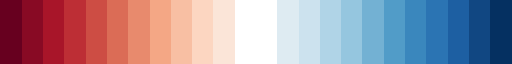

In [10]:
cmap = cm.get_cmap('RdBu', 24)
color_list = [matplotlib.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]
color_list[11] = '#ffffff'
color_list[12] = '#ffffff'
cmap_rdbu = ListedColormap(color_list)
cmap_rdbu

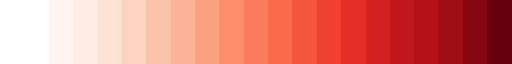

In [11]:
cmap = cm.get_cmap('Reds', 19)
color_list = [matplotlib.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]
color_list2 = []
color_list2.append('#ffffff')
color_list2.append('#ffffff')
for i in range(19):
    color_list2.append(color_list[i])
cmap_rd = ListedColormap(color_list2)
cmap_rd

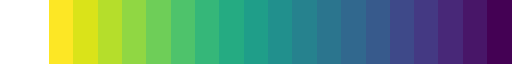

In [12]:
cmap = cm.get_cmap('viridis_r', 19)
color_list = [matplotlib.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]
color_list2 = []
color_list2.append('#ffffff')
color_list2.append('#ffffff')
for i in range(19):
    color_list2.append(color_list[i])
cmap_vd = ListedColormap(color_list2)
cmap_vd

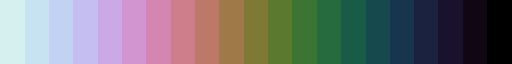

In [13]:
cmap = cm.get_cmap('cubehelix_r', 23)
color_list = [matplotlib.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]
color_list2 = []
# color_list2.append('#ffffff')
# color_list2.append('#ffffff')
for i in np.arange(2,23,1):
    color_list2.append(color_list[i])
cmap_ch = ListedColormap(color_list2)
cmap_ch

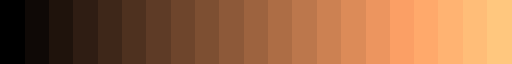

In [14]:
cmap_cv = cm.get_cmap('cividis_r', 19)
cmap_wi = cm.get_cmap('winter', 21)
cmap_cp = cm.get_cmap('copper', 21)
cmap_vd2 = cm.get_cmap('viridis_r', 21)
cmap_cp

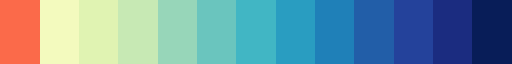

In [15]:
cmap = cm.get_cmap('YlGnBu', 13)
color_list = [matplotlib.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]
color_list2 = []
color_list2.append('#fb6a4a')
# color_list2.append('#fdcab5')

for i in range(12):
    color_list2.append(color_list[i+1])
cmap_srdiff = ListedColormap(color_list2)
# cmap_rd = cm.get_cmap('YlGnBu', 11)
cmap_srdiff


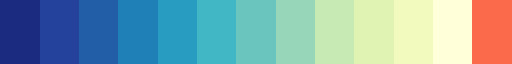

In [16]:
cmap = cm.get_cmap('YlGnBu_r', 13)
color_list = [matplotlib.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]
color_list2 = []

# color_list2.append('#fdcab5')

for i in range(12):
    color_list2.append(color_list[i+1])
color_list2.append('#fb6a4a')
cmap_srdiff = ListedColormap(color_list2)
# cmap_rd = cm.get_cmap('YlGnBu', 11)
cmap_srdiff

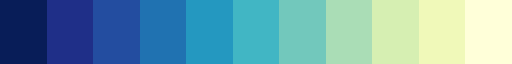

In [17]:
cmap_ylgnbu = cm.get_cmap('YlGnBu_r', 11)
cmap_ylgnbu

In [18]:
colors =['white','white','white']
cmap_grey = LinearSegmentedColormap.from_list('cm',colors, N=3)

## GRIDDED MAP IA AND IWU

In [67]:
iwu = xr.open_dataset(f'{work_dir}/data/IWU_irri_data/IWU_2011_2018_setyear.nc')

In [68]:
# from monthly mean values to mm/day and mm/year
dm = [31,28,31,30,31,30,31,31,30,31,30,31]
dm = dm*8

l=[]
for i in range(len(iwu.time)):
    p = iwu.IWUens[i,:,:]/dm[i]
    l.append(p)
iwu2 = xr.concat(l,dim='time')

iwu2m = iwu2.mean(dim='time')*365

In [69]:
iwu2m = iwu2m.transpose("lat", "lon")

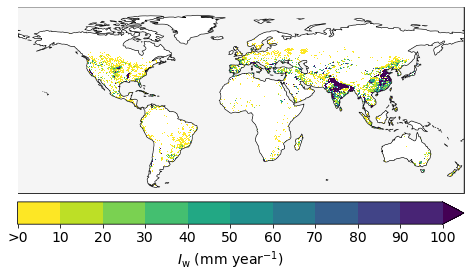

In [70]:
lvls = np.linspace(0,100,11) 
lvls2 = np.linspace(0,100,11) 
cmapv = plt.cm.viridis_r  # define the colormap

z = iwu2m.where(iwu2m==0)

# fig with stats
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.2)
ax.set_global()
cf = iwu2m.plot(ax=ax, cmap=cmapv, add_colorbar=False, vmin=0, vmax=5, levels=lvls)#plot all points
cf3 = z.plot(ax=ax, cmap=cmap_grey, add_colorbar=False, vmin=0, vmax=5, levels=[0,1])
cbar = plt.colorbar(cf, orientation='horizontal',extend='max', pad=0.02, ticks=lvls2)
cbar.ax.tick_params(labelsize=14)
cbar.ax.set_xticklabels(['>0','10','20','30','40','50','60','70','80','90','100'])
cbar.set_label(label='$I_\mathrm{w}$ ($\mathrm{mm}$ $\mathrm{year}^{-1}$)', size=14)
ax.set_title(f'',size=14)
ax.set_ylim(-60,90)
ax.set_xlim(-180,180)
fig.savefig(f'{fig_dir}/map_mean_iwu_gridded.jpg',dpi=200,bbox_inches='tight')


In [71]:
ia = xr.open_dataset(f'{work_dir}/data/irrigated_area/AEI_HYDE_FINAL_IR_2005_fraction.nc')
ia = ia.AEI_HYDE_FINAL_IR_2005[0,:,:]
ia

<xarray.DataArray 'AEI_HYDE_FINAL_IR_2005' (lat: 2160, lon: 4320)>
[9331200 values with dtype=float32]
Coordinates:
    time     datetime64[ns] 2005-01-01
  * lon      (lon) float64 -180.0 -179.9 -179.8 -179.8 ... 179.7 179.8 179.9
  * lat      (lat) float64 90.0 89.92 89.83 89.75 ... -89.75 -89.83 -89.92

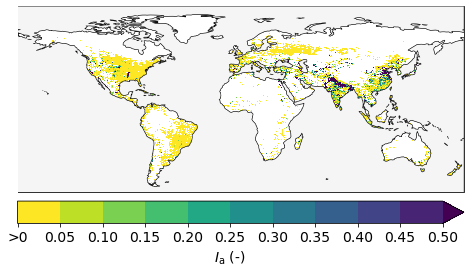

In [72]:
lvls = np.linspace(0,0.5,11) 
lvls2 = np.linspace(0,0.5,11) 
cmapv = plt.cm.viridis_r  # define the colormap

z = ia.where(ia==0)

# fig with stats
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.2)
ax.set_global()
cf = ia.plot(ax=ax, cmap=cmapv, add_colorbar=False, vmin=0, vmax=5, levels=lvls)#plot all points
cf3 = z.plot(ax=ax, cmap=cmap_grey, add_colorbar=False, vmin=0, vmax=5, levels=[0,1])
cbar = plt.colorbar(cf, orientation='horizontal',extend='max', pad=0.02, ticks=lvls2)
cbar.ax.tick_params(labelsize=14)
cbar.ax.set_xticklabels(['>0','0.05','0.10','0.15','0.20','0.25','0.30','0.35','0.40','0.45','0.50'])
cbar.set_label(label='$I_\mathrm{a}$ (-)', size=14)
ax.set_title(f'',size=12)
ax.set_ylim(-60,90)
ax.set_xlim(-180,180)
fig.savefig(f'{fig_dir}/map_mean_ia_gridded.jpg',dpi=200,bbox_inches='tight')

## Method figure

In [19]:
# catch_id = 'in_0000134'
# catch_id = 'de_0000251'
catch_id = 'de_0000055'
sd_f0 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sd/{catch_id}.csv',index_col=0)
sd_fiwu = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sd/{catch_id}_fiwu2.csv',index_col=0)
sd_fopt = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f1.85ia/sd/{catch_id}_f1.85ia.csv',index_col=0)
sd_f0.index = pd.to_datetime(sd_f0.index)
sd_fiwu.index = pd.to_datetime(sd_fiwu.index)
sd_fopt.index = pd.to_datetime(sd_fopt.index)

# se_f0 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/se/{catch_id}.csv',index_col=0)
se_fiwu = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/se/{catch_id}_fiwu2.csv',index_col=0)
# se_f0.index = pd.to_datetime(sd_f0.index)
se_fiwu.index = pd.to_datetime(se_fiwu.index)

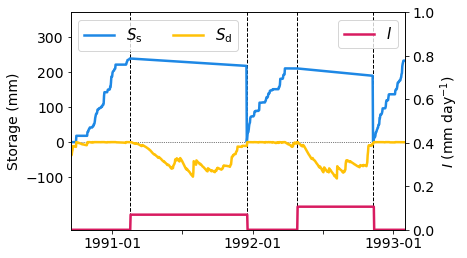

In [20]:
sd_fiwu2 = sd_fiwu.loc['1990-09-01':'1993-03-31']
sd_fiwu3 = sd_fiwu.loc['1990-09-01':'1993-03-31']
# sd_fiwu2 = sd_fiwu.loc['2005-01-01':'2006-12-31']
sd_fiwu2.index = pd.to_datetime(sd_fiwu2.index)
b1 = sd_fiwu.loc['2004-11-19':'2005-12-15'].se2.cumsum()
b2 = sd_fiwu.loc['2005-12-15':'2006-12-29'].se2.cumsum()
b3 = sd_fiwu.loc['2006-12-29':'2007-02-28'].se2.cumsum()
b4 = pd.concat([b1,b2,b3])
# b.index = b['index']
# b.loc['2005-12-15':'2005-12-31'].se2 = [b.loc['2005-06-30'].values[1]]*17
# b.se2.plot()

sd_fiwu.p_irri.loc['1990-09-10':'1990-09-30']= np.zeros(21)

# add irrigation Ss decline in Se-cum variable for the two irrigation periods
sd_fiwu4 = sd_fiwu3.loc['1991-02-16':'1991-12-17']
ini = sd_fiwu4.loc['1991-02-16'].se_cum
rate = sd_fiwu4.loc['1991-02-18'].p_irri
se_cum2=np.zeros(len(sd_fiwu4))
for i in range(len(sd_fiwu4)-1):
    se_cum2[i] = ini - i*rate
len(se_cum2)
sd_fiwu4['se_cum2'] = se_cum2
sd_fiwu3['se_cum2'] = sd_fiwu3['se_cum']
sd_fiwu3.loc['1991-02-16':'1991-12-17']['se_cum2'] = sd_fiwu4['se_cum2']

sd_fiwu5 = sd_fiwu3.loc['1992-04-25':'1992-11-10']
ini = sd_fiwu5.loc['1992-04-25'].se_cum
rate = sd_fiwu5.loc['1992-04-27'].p_irri
se_cum2=np.zeros(len(sd_fiwu5))
for i in range(len(sd_fiwu5)-2):
    se_cum2[i] = ini - i*rate
len(se_cum2)
sd_fiwu5['se_cum2'] = se_cum2
sd_fiwu3.loc['1992-04-26':'1992-11-10']['se_cum2'] = sd_fiwu5['se_cum2']


fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
ax.hlines(0,pd.to_datetime('1990-09-15'),pd.to_datetime('1993-02-01'),color='k',linestyle=':',linewidth=0.7)
ax.vlines(pd.to_datetime('1992-04-26'),-400,400,color='k',linestyle='--',linewidth=1)
ax.vlines(pd.to_datetime('1992-11-10'),-400,400,color='k',linestyle='--',linewidth=1)
ax.vlines(pd.to_datetime('1991-02-16'),-400,400,color='k',linestyle='--',linewidth=1)
ax.vlines(pd.to_datetime('1991-12-17'),-400,400,color='k',linestyle='--',linewidth=1)
# ax.plot(sd_fiwu.index,sd_fiwu.se2, label='$S_{\mathrm{s}$')
# ax.plot(b1.index, b1, color='tab:blue',linewidth=2.5, label='$S_{\mathrm{s}}$')
# ax.plot(b2.index, b2, color='tab:blue',linewidth=2.5)
# ax.plot(b3.index, b3, color='tab:blue',linewidth=2.5)
# ax.plot(b4.index, b4, color=c1, linewidth=2.5, label='$S_{\mathrm{s}}$')
ax.plot(sd_fiwu3.index,sd_fiwu3['se_cum2'], color=c2, linewidth=2.5, label='$S_{\mathrm{s}}$')
ax.plot(sd_fiwu.index,sd_fiwu.Sd, color=c3, linewidth=2.5,label='$S_{\mathrm{d}}$')
ax2.plot(sd_fiwu2.index,sd_fiwu2.p_irri, color=c1, linewidth=2.5,label='$I$')

ax.set_yticks([-100,0,100,200,300])
    # 50,100,150,200,250,0,-50,-100,-150,-200,-250])
# ax2.set_yticks([0,50,100,150,200,250])
ax.set_ylim(-250,370)
ax2.set_ylim(0,1)
# ax.set_xlim(pd.to_datetime('1988-11-25'),pd.to_datetime('1990-12-15'))
ax.set_xlim(pd.to_datetime('1990-09-15'),pd.to_datetime('1993-02-01'))
ax.set_xticks(['1991-01-01','1991-07-01','1992-01-01','1992-07-01','1993-01-01'])
ax.set_xticklabels(['1991-01','','1992-01','','1993-01'])

# ax.text('1991-01-08',-85,'$t_{\mathrm{d},0}$',size=14,rotation=90)
# ax.text('1991-01-08',55,'$t_{\mathrm{s},1}$',size=14,rotation=90)
# ax.text('1991-11-05',-85,'$t_{\mathrm{d},1}$',size=14,rotation=90)
# ax.text('1991-11-05',55,'$t_{\mathrm{s},0}$',size=14,rotation=90)
# ax.text('1992-03-15',-85,'$t_{\mathrm{d},0}$',size=14,rotation=90)
# ax.text('1992-03-15',55,'$t_{\mathrm{s},1}$',size=14,rotation=90)
# ax.text('1992-09-25',-85,'$t_{\mathrm{d},1}$',size=14,rotation=90)
# ax.text('1992-09-25',55,'$t_{\mathrm{s},0}$',size=14,rotation=90)
# ax.text('1992-09-25',55,'$t_{\mathrm{s},0}$',size=14,rotation=90)


ax.set_ylabel('Storage (mm)', size=14)
ax2.set_ylabel('$I$ ($\mathrm{mm}$ $\mathrm{day}^{-1}$)', size=14)
ax.tick_params(axis='both', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)
ax.legend(ncol=2, fontsize=15,loc='upper left')
ax2.legend(ncol=1, fontsize=15,loc='upper right')
fig.savefig(f'{fig_dir}/sd_ss_timeseries_zoom.jpg',dpi=200,bbox_inches='tight')

## optimization of beta

In [21]:
df = pd.read_csv(f'{work_dir}/data/irrigated_area/output/combined_ia.csv',index_col=0) 
d = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f_optimization2.csv',index_col=0)

In [22]:
# MINIMIZE ABSOLUTE ERROR
f_min=0
f_max=4
nmax=10000
b = np.linspace(0,2.5,1000)
A=np.zeros((len(b),8))

for n in range(1,len(b)+1):
    f = b[n-1]
    o = f*d['ia']
    er = o-d['fiwu']
    er_m = er.mean()
    er_mse = np.mean(er**2)
    er_mae = np.mean(np.abs(er))
    er_std =er.std()
    er_med = er.median()
    er_iqr =er.quantile(0.75) - er.quantile(0.25)
    er_rmse = np.sqrt(np.mean((o-d['fiwu'])**2))
    
    A[n-1,:] = [f,er_m,er_mse,er_mae,er_std,er_med,er_iqr,er_rmse]

ind=find_nearest(A[:,1],0)
fopt_mean=np.round(A[ind,0],3)
    
ind=np.argmin(A[:,2],0)
fopt_mse=np.round(A[ind,0],3)

ind=np.argmin(A[:,3],0)
fopt_mae=np.round(A[ind,0],3)

ind=np.argmin(A[:,4])
fopt_std=np.round(A[ind,0],3)

ind=find_nearest(A[:,5],0)
fopt_median=np.round(A[ind,0],3)

ind=np.argmin(A[:,6])
fopt_iqr=np.round(A[ind,0],3)

ind=np.argmin(A[:,7])
fopt_rmse=np.round(A[ind,0],3)

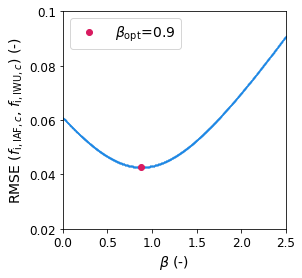

In [23]:
# RMSE figure optimization
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.plot(A[:,0], A[:,7],'o',color=c2,markersize=0.5)
ax.plot(1,1,'o',color=c2,markersize=6)
ax.plot(fopt_rmse,0.0426,'o',color=c1,markersize=6,label=r'$\beta_{\mathrm{opt}}$='+str(np.round(fopt_rmse,1)))
# ax.vlines(fopt_rmse,A[:,7].min(),A[:,7].max(), label='fopt')
ax.set_xlim(0,2.5)
ax.set_ylim(0.02,0.10)
ax.set_yticks([0.02,0.04,0.06,0.08,0.10])
ax.set_yticklabels([0.02,0.04,0.06,0.08,0.10],size=12)
ax.set_xticklabels([0.0,0.5,1.0,1.5,2.0,2.5],size=12)
ax.set_xlabel(r'$\beta$ (-)',fontsize=14)
ax.set_ylabel('RMSE ($f_{\mathrm{i,IAF},c}$, $f_{\mathrm{i,IWU},c}$) (-)',fontsize=14)
# ax.set_title('min(RMSE) for $f_{\mathrm{i,opt}}$='+str(fopt_rmse),size=14)
ax.legend(fontsize=14,loc='upper left')
fig.savefig(f'{fig_dir}/monte_carlo_rmse.jpg',dpi=300,bbox_inches='tight')

## Sd TIMESERIES

In [19]:
def plot_sd_timeseries(catch_id,region):
    sd_f0 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sd/{catch_id}.csv',index_col=0)
    sd_fiwu = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sd/{catch_id}_fiwu2.csv',index_col=0)
    sd_fopt = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sd/{catch_id}_f0.9ia.csv',index_col=0)
    sd_f0.index = pd.to_datetime(sd_f0.index)
    sd_fiwu.index = pd.to_datetime(sd_fiwu.index)
    sd_fopt.index = pd.to_datetime(sd_fopt.index)    
   
    sr_df_ni = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sr_no_irri_combined_points.csv', index_col=0)
    sr_df_f09ia = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sr_irri_f0.9ia_combined_points.csv', index_col=0)
    sr_df_fiwu2 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sr_irri_fiwu2_combined_points.csv', index_col=0)

    sr_df = pd.DataFrame(index=sr_df_ni.index)
    sr_f0 = int(sr_df_ni['k3'].loc[catch_id])
    sr_fiwu = int(sr_df_fiwu2['k3'].loc[catch_id])
    sr_fopt = int(sr_df_f09ia['k3'].loc[catch_id])
    
    iwu = pd.read_csv(f'{work_dir}/output/irrigation/processed2/monthly_mean/{catch_id}.csv',index_col=0) # read iwu data
    iwu_mean = np.int(iwu.mean().values[0]*365) # annual mean IWU
    ir2 = pd.read_csv(f'{work_dir}/data/irrigated_area/output/combined_ia.csv',index_col=0) #read ia data
    ir_area = np.round(ir2.loc[catch_id].hi,3) # irrigated area fraction 

    fig = plt.figure(figsize=(18,4))
    ax = fig.add_subplot(111)
    ax.plot(sd_f0.index,sd_f0.Sd,color='black',linestyle='-', label='$S_\mathrm{d}$-NI, $S_\mathrm{r}$='+str(sr_f0)+' mm',linewidth=1)
    # ax.plot(sd_fiwu.index,sd_fiwu.sd2, color=c3, label='$S_\mathrm{d}$-IWU, $S_\mathrm{r}$='+str(sr_fiwu)+' mm',linewidth=1.5)
    ax.plot(sd_fopt.index,sd_fopt.sd2, color=c2, label='$S_\mathrm{d}$-IA, $S_\mathrm{r}$='+str(sr_fopt)+' mm',linewidth=1.5)
    ax.set_xlim(sd_f0.index[0],sd_f0.index[-10])
    ax.set_ylabel('$S_\mathrm{d}$ (mm)', size=15)
    ax.tick_params(axis='both', labelsize=15)
    ax.legend(ncol=3, fontsize=16, loc='lower left')
    ax.set_title('Catchment ID: '+str(region)+', $\mathrm{IWU}_{\mathrm{mean}}$ = '+str(iwu_mean)+' $\mathrm{mm}$ $\mathrm{year}^{-1}$, IA = '+str(ir_area),size=16)
    
    fig = plt.figure(figsize=(4,3))
    ax = fig.add_subplot(111)
    ca = catch_id
    d1 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sr/{ca}_points.csv',index_col=0)
    d2 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sr/{ca}_fiwu2_points.csv',index_col=0)
    d3 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sr/{ca}_f0.9ia_points.csv',index_col=0)
    ax.vlines(2,-350,350,'k',linestyle='--',linewidth=0.8)
    ax.hlines(0,0,30,color='k',linestyle=':',linewidth=0.7)
    ax.plot(d1['T'], d1['sd']*-1,'x',color='k', markersize=7,markeredgewidth=1.3, label='NI')
    ax.plot(d2['T'], d2['sd']*-1,'x',color=c3, markersize=7,markeredgewidth=1.3, label='IWU')
    ax.plot(d3['T'], d3['sd']*-1,'x',color=c2, markersize=7,markeredgewidth=1.3, label='IAF')
    ax.set_ylim(-350,40)
    ax.set_ylabel('$S_\mathrm{d,M}$ (mm)', size=15)
    ax.tick_params(axis='both', labelsize=15)
    ax.set_xscale('log')
    ax.set_xlim(0,30)
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position("right")
    ax.legend(loc='best',framealpha=0.5,fontsize=16)
    # fig.savefig(f'{fig_dir}/timeseries_sd_{catch_id}.jpg', dpi=300, bbox_inches='tight')


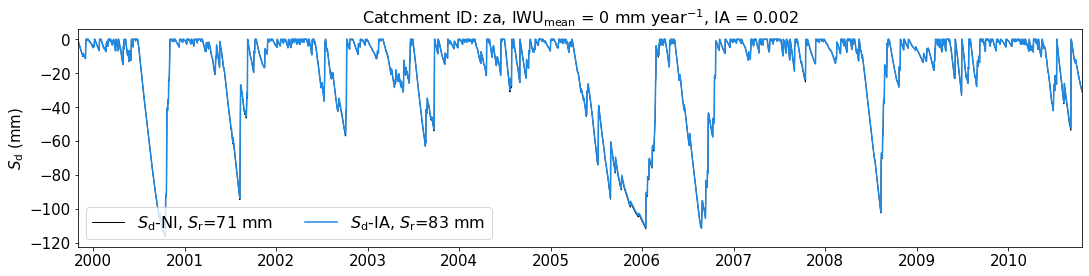

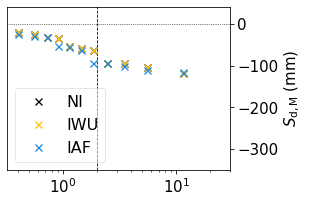

In [71]:
plot_sd_timeseries('us_0006081','za')

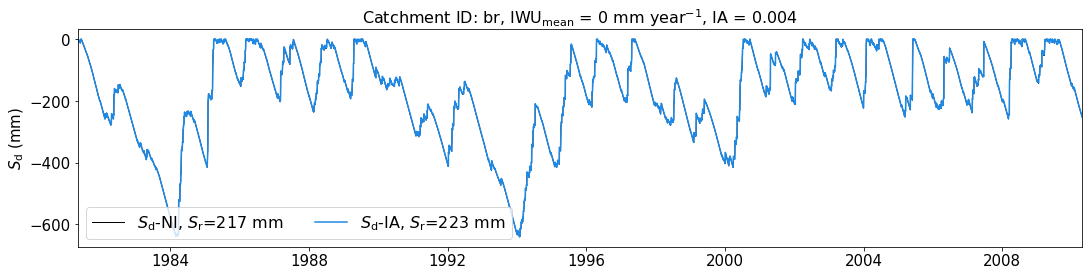

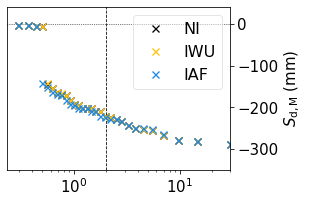

In [72]:
plot_sd_timeseries('br_0000699','br')

In [20]:
ca0='br_0002791'
ca1='us_0006399'
ca5='es_0000742'
ca10='in_0000134'

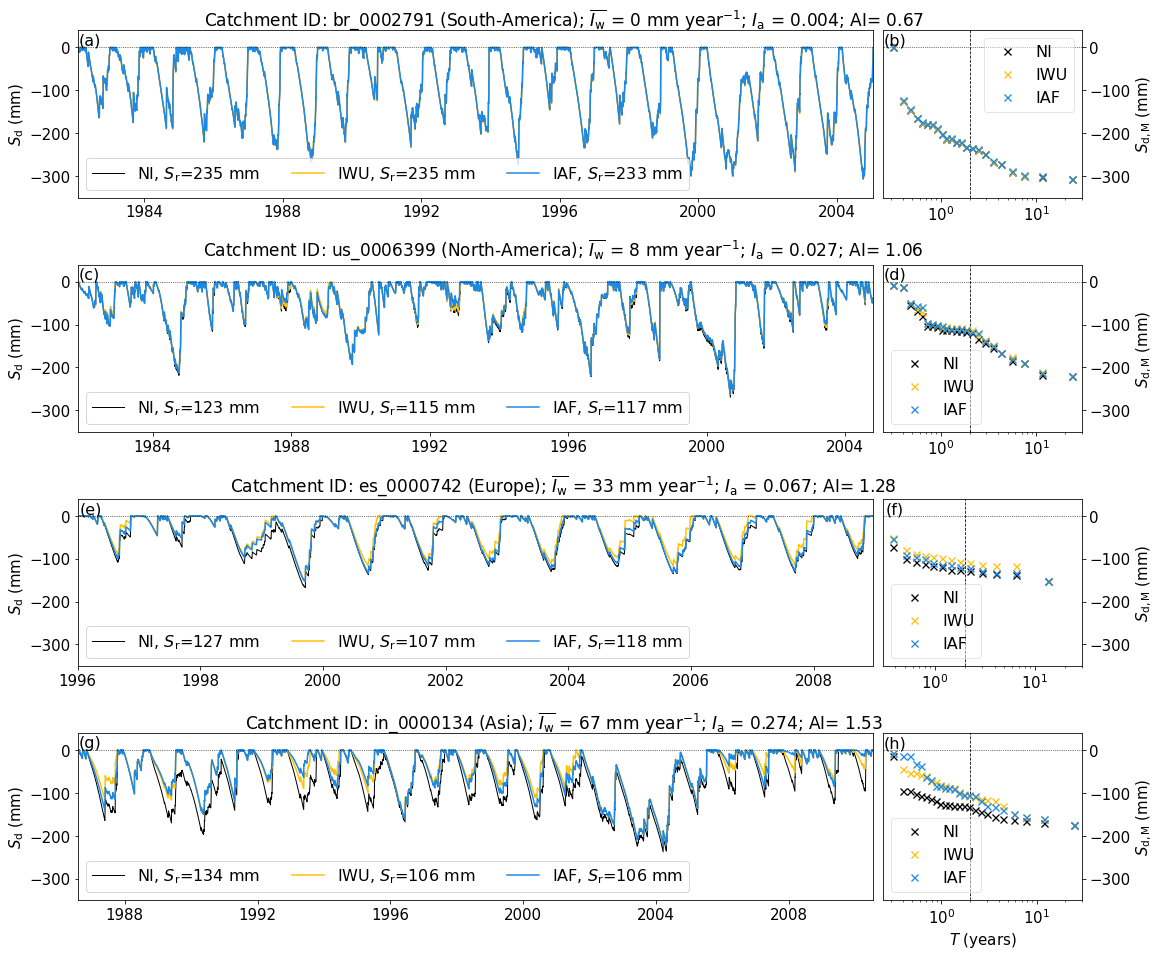

In [30]:
# plot timeseries catchments in subplots
cc = pd.read_csv(f'{work_dir}/output/catchment_characteristics/catchment_characteristics_gswp-p_gleam-ep_gswp-t.csv',index_col=0)
cc.ai = 1/cc.ai
ai = cc.ai

#South-America
catch_id = 'br_0002791'
region = f'{catch_id} (South-America)'
sd_f0 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sd/{catch_id}.csv',index_col=0)
sd_fiwu = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sd/{catch_id}_fiwu2.csv',index_col=0)
sd_fopt = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sd/{catch_id}_f0.9ia.csv',index_col=0)
sd_f0.index = pd.to_datetime(sd_f0.index)
sd_fiwu.index = pd.to_datetime(sd_fiwu.index)
sd_fopt.index = pd.to_datetime(sd_fopt.index)    

sr_df_ni = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sr_no_irri_combined_points.csv', index_col=0)
sr_df_f09ia = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sr_irri_f0.9ia_combined_points.csv', index_col=0)
sr_df_fiwu2 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sr_irri_fiwu2_combined_points.csv', index_col=0)

sr_df = pd.DataFrame(index=sr_df_ni.index)
sr_f0 = int(sr_df_ni['k3'].loc[catch_id])
sr_fiwu = int(sr_df_fiwu2['k3'].loc[catch_id])
sr_fopt = int(sr_df_f09ia['k3'].loc[catch_id])

iwu = pd.read_csv(f'{work_dir}/output/irrigation/processed2/monthly_mean/{catch_id}.csv',index_col=0) # read iwu data
iwu_mean = np.int(iwu.mean().values[0]*365) # annual mean IWU
ir2 = pd.read_csv(f'{work_dir}/data/irrigated_area/output/combined_ia.csv',index_col=0) #read ia data
ir_area = np.round(ir2.loc[catch_id].hi,3) # irrigated area fraction 

fig, ax = plt.subplots(nrows=4,ncols=2,figsize=(18,16),gridspec_kw={'width_ratios': [4, 1],'hspace': 0.4,'wspace':0.02})
# plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]})
# fig = plt.figure(figsize=(14,20))
# ax = fig.add_subplot(421)
# plt.subplots()
# plt.subplots_adjust(hspace=0.32)
ax[0,0].plot(sd_f0.index,sd_f0.Sd,color='black',linestyle='-', label='NI, $S_\mathrm{r}$='+str(sr_f0)+' mm',linewidth=1)
ax[0,0].plot(sd_fiwu.index,sd_fiwu.sd2, color=c3, label='IWU, $S_\mathrm{r}$='+str(sr_fiwu)+' mm',linewidth=1.5)
ax[0,0].plot(sd_fopt.index,sd_fopt.sd2, color=c2, label='IAF, $S_\mathrm{r}$='+str(sr_fopt)+' mm',linewidth=1.5)
ax[0,0].hlines(0,sd_f0.index[0],sd_f0.index[-10],color='k',linestyle=':',linewidth=0.7)
ax[0,0].set_xlim(sd_f0.index[0],sd_f0.index[-10])
ax[0,0].annotate('(a)',(sd_f0.index[0]+timedelta(days=10),6),size=16)
ax[0,0].set_ylim(-350,40)
ax[0,0].set_ylabel('$S_\mathrm{d}$ (mm)', size=15)
ax[0,0].tick_params(axis='both', labelsize=15)
ax[0,0].legend(ncol=3, fontsize=16, loc='lower left')
plt.figtext(0.5, 0.89, 'Catchment ID: '+str(region)+'; $\overline{I_\mathrm{w}}$ = '+str(iwu_mean)+' $\mathrm{mm}$ $\mathrm{year}^{-1}$; $I_\mathrm{a}$ = '+str(ir_area)+'; AI= '+str(np.round(ai.loc[catch_id],2)), ha='center', va='center',size=17)

#North-America
catch_id = 'us_0006399'
region = f'{catch_id} (North-America)'
sd_f0 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sd/{catch_id}.csv',index_col=0)
sd_fiwu = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sd/{catch_id}_fiwu2.csv',index_col=0)
sd_fopt = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sd/{catch_id}_f0.9ia.csv',index_col=0)
sd_f0.index = pd.to_datetime(sd_f0.index)
sd_fiwu.index = pd.to_datetime(sd_fiwu.index)
sd_fopt.index = pd.to_datetime(sd_fopt.index)    

sr_df_ni = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sr_no_irri_combined_points.csv', index_col=0)
sr_df_f09ia = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sr_irri_f0.9ia_combined_points.csv', index_col=0)
sr_df_fiwu2 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sr_irri_fiwu2_combined_points.csv', index_col=0)

sr_df = pd.DataFrame(index=sr_df_ni.index)
sr_f0 = int(sr_df_ni['k3'].loc[catch_id])
sr_fiwu = int(sr_df_fiwu2['k3'].loc[catch_id])
sr_fopt = int(sr_df_f09ia['k3'].loc[catch_id])

iwu = pd.read_csv(f'{work_dir}/output/irrigation/processed2/monthly_mean/{catch_id}.csv',index_col=0) # read iwu data
iwu_mean = np.int(iwu.mean().values[0]*365) # annual mean IWU
ir2 = pd.read_csv(f'{work_dir}/data/irrigated_area/output/combined_ia.csv',index_col=0) #read ia data
ir_area = np.round(ir2.loc[catch_id].hi,3) # irrigated area fraction 

# ax = fig.add_subplot(423)
ax[1,0].plot(sd_f0.index,sd_f0.Sd,color='black',linestyle='-', label='NI, $S_\mathrm{r}$='+str(sr_f0)+' mm',linewidth=1)
ax[1,0].plot(sd_fiwu.index,sd_fiwu.sd2, color=c3, label='IWU, $S_\mathrm{r}$='+str(sr_fiwu)+' mm',linewidth=1.5)
ax[1,0].plot(sd_fopt.index,sd_fopt.sd2, color=c2, label='IAF, $S_\mathrm{r}$='+str(sr_fopt)+' mm',linewidth=1.5)
ax[1,0].hlines(0,sd_f0.index[0],sd_f0.index[-10],color='k',linestyle=':',linewidth=0.7)
ax[1,0].set_xlim(sd_f0.index[0],sd_f0.index[-10])
ax[1,0].annotate('(c)',(sd_f0.index[0]+timedelta(days=10),6),size=16)
ax[1,0].set_ylim(-350,40)
ax[1,0].set_ylabel('$S_\mathrm{d}$ (mm)', size=15)
ax[1,0].tick_params(axis='both', labelsize=15)
ax[1,0].legend(ncol=3, fontsize=16, loc='lower left')
plt.figtext(0.5, 0.69, 'Catchment ID: '+str(region)+'; $\overline{I_\mathrm{w}}$ = '+str(iwu_mean)+' $\mathrm{mm}$ $\mathrm{year}^{-1}$; $I_\mathrm{a}$ = '+str(ir_area)+'; AI= '+str(np.round(ai.loc[catch_id],2)), ha='center', va='center',size=17)

#Europe
catch_id = 'es_0000742'
region = f'{catch_id} (Europe)'
sd_f0 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sd/{catch_id}.csv',index_col=0)
sd_fiwu = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sd/{catch_id}_fiwu2.csv',index_col=0)
sd_fopt = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sd/{catch_id}_f0.9ia.csv',index_col=0)
sd_f0.index = pd.to_datetime(sd_f0.index)
sd_fiwu.index = pd.to_datetime(sd_fiwu.index)
sd_fopt.index = pd.to_datetime(sd_fopt.index)    

sr_df_ni = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sr_no_irri_combined_points.csv', index_col=0)
sr_df_f09ia = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sr_irri_f0.9ia_combined_points.csv', index_col=0)
sr_df_fiwu2 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sr_irri_fiwu2_combined_points.csv', index_col=0)

sr_df = pd.DataFrame(index=sr_df_ni.index)
sr_f0 = int(sr_df_ni['k3'].loc[catch_id])
sr_fiwu = int(sr_df_fiwu2['k3'].loc[catch_id])
sr_fopt = int(sr_df_f09ia['k3'].loc[catch_id])

iwu = pd.read_csv(f'{work_dir}/output/irrigation/processed2/monthly_mean/{catch_id}.csv',index_col=0) # read iwu data
iwu_mean = np.int(iwu.mean().values[0]*365) # annual mean IWU
ir2 = pd.read_csv(f'{work_dir}/data/irrigated_area/output/combined_ia.csv',index_col=0) #read ia data
ir_area = np.round(ir2.loc[catch_id].hi,3) # irrigated area fraction 

ax[2,0].plot(sd_f0.index,sd_f0.Sd,color='black',linestyle='-', label='NI, $S_\mathrm{r}$='+str(sr_f0)+' mm',linewidth=1)
ax[2,0].plot(sd_fiwu.index,sd_fiwu.sd2, color=c3, label='IWU, $S_\mathrm{r}$='+str(sr_fiwu)+' mm',linewidth=1.5)
ax[2,0].plot(sd_fopt.index,sd_fopt.sd2, color=c2, label='IAF, $S_\mathrm{r}$='+str(sr_fopt)+' mm',linewidth=1.5)
ax[2,0].hlines(0,sd_f0.index[0],sd_f0.index[-10],color='k',linestyle=':',linewidth=0.7)
ax[2,0].set_xlim(sd_f0.index[0],sd_f0.index[-10])
ax[2,0].annotate('(e)',(sd_f0.index[0]+timedelta(days=10),6),size=16)
ax[2,0].set_ylim(-350,40)
ax[2,0].set_ylabel('$S_\mathrm{d}$ (mm)', size=15)
ax[2,0].tick_params(axis='both', labelsize=15)
ax[2,0].legend(ncol=3, fontsize=16, loc='lower left')
plt.figtext(0.5, 0.485, 'Catchment ID: '+str(region)+'; $\overline{I_\mathrm{w}}$ = '+str(iwu_mean)+' $\mathrm{mm}$ $\mathrm{year}^{-1}$; $I_\mathrm{a}$ = '+str(ir_area)+'; AI= '+str(np.round(ai.loc[catch_id],2)), ha='center', va='center',size=17)

#Asia
catch_id = 'in_0000134'
region = f'{catch_id} (Asia)'
sd_f0 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sd/{catch_id}.csv',index_col=0)
sd_fiwu = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sd/{catch_id}_fiwu2.csv',index_col=0)
sd_fopt = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sd/{catch_id}_f0.9ia.csv',index_col=0)
sd_f0.index = pd.to_datetime(sd_f0.index)
sd_fiwu.index = pd.to_datetime(sd_fiwu.index)
sd_fopt.index = pd.to_datetime(sd_fopt.index)    

sr_df_ni = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sr_no_irri_combined_points.csv', index_col=0)
sr_df_f09ia = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sr_irri_f0.9ia_combined_points.csv', index_col=0)
sr_df_fiwu2 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sr_irri_fiwu2_combined_points.csv', index_col=0)

sr_df = pd.DataFrame(index=sr_df_ni.index)
sr_f0 = int(sr_df_ni['k3'].loc[catch_id])
sr_fiwu = int(sr_df_fiwu2['k3'].loc[catch_id])
sr_fopt = int(sr_df_f09ia['k3'].loc[catch_id])

iwu = pd.read_csv(f'{work_dir}/output/irrigation/processed2/monthly_mean/{catch_id}.csv',index_col=0) # read iwu data
iwu_mean = np.int(iwu.mean().values[0]*365) # annual mean IWU
ir2 = pd.read_csv(f'{work_dir}/data/irrigated_area/output/combined_ia.csv',index_col=0) #read ia data
ir_area = np.round(ir2.loc[catch_id].hi,3) # irrigated area fraction 

ax[3,0].plot(sd_f0.index,sd_f0.Sd,color='black',linestyle='-', label='NI, $S_\mathrm{r}$='+str(sr_f0)+' mm',linewidth=1)
ax[3,0].plot(sd_fiwu.index,sd_fiwu.sd2, color=c3, label='IWU, $S_\mathrm{r}$='+str(sr_fiwu)+' mm',linewidth=1.5)
ax[3,0].plot(sd_fopt.index,sd_fopt.sd2, color=c2, label='IAF, $S_\mathrm{r}$='+str(sr_fopt)+' mm',linewidth=1.5)
ax[3,0].hlines(0,sd_f0.index[0],sd_f0.index[-10],color='k',linestyle=':',linewidth=0.7)
ax[3,0].set_xlim(sd_f0.index[0],sd_f0.index[-10])
ax[3,0].annotate('(g)',(sd_f0.index[0]+timedelta(days=10),6),size=16)
ax[3,0].set_ylim(-350,40)
ax[3,0].set_ylabel('$S_\mathrm{d}$ (mm)', size=15)
ax[3,0].tick_params(axis='both', labelsize=15)
ax[3,0].legend(ncol=3, fontsize=16, loc='lower left')
plt.figtext(0.5, 0.28, 'Catchment ID: '+str(region)+'; $\overline{I_\mathrm{w}}$ = '+str(iwu_mean)+' $\mathrm{mm}$ $\mathrm{year}^{-1}$; $I_\mathrm{a}$ = '+str(ir_area)+'; AI= '+str(np.round(ai.loc[catch_id],2)), ha='center', va='center',size=17)

# plot gumbel distribution
ca=ca0
d1 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sr/{ca}_points.csv',index_col=0)
d2 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sr/{ca}_fiwu2_points.csv',index_col=0)
d3 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sr/{ca}_f0.9ia_points.csv',index_col=0)
ax[0,1].vlines(2,-350,350,'k',linestyle='--',linewidth=0.8)
ax[0,1].hlines(0,0,30,color='k',linestyle=':',linewidth=0.7)
ax[0,1].plot(d1['T'], d1['sd']*-1,'x',color='k', markersize=7,markeredgewidth=1.3, label='NI')
ax[0,1].plot(d2['T'], d2['sd']*-1,'x',color=c3, markersize=7,markeredgewidth=1.3, label='IWU')
ax[0,1].plot(d3['T'], d3['sd']*-1,'x',color=c2, markersize=7,markeredgewidth=1.3, label='IAF')
ax[0,1].annotate('(b)',(0.25,6),size=16)
ax[0,1].set_ylim(-350,40)
ax[0,1].set_ylabel('$S_\mathrm{d,M}$ (mm)', size=15)
ax[0,1].tick_params(axis='both', labelsize=15)
ax[0,1].set_xscale('log')
ax[0,1].set_xlim(0,30)
ax[0,1].yaxis.tick_right()
ax[0,1].yaxis.set_label_position("right")
ax[0,1].legend(loc='upper right',framealpha=0.5,fontsize=16)

ca=ca1
d1 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sr/{ca}_points.csv',index_col=0)
d2 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sr/{ca}_fiwu2_points.csv',index_col=0)
d3 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sr/{ca}_f0.9ia_points.csv',index_col=0)
ax[1,1].vlines(2,-350,350,'k',linestyle='--',linewidth=0.8)
ax[1,1].hlines(0,0,30,color='k',linestyle=':',linewidth=0.7)
ax[1,1].plot(d1['T'], d1['sd']*-1,'x',color='k', markersize=7,markeredgewidth=1.3, label='NI')
ax[1,1].plot(d2['T'], d2['sd']*-1,'x',color=c3, markersize=7,markeredgewidth=1.3, label='IWU')
ax[1,1].plot(d3['T'], d3['sd']*-1,'x',color=c2, markersize=7,markeredgewidth=1.3, label='IAF')
ax[1,1].annotate('(d)',(0.25,6),size=16)
ax[1,1].set_ylim(-350,40)
ax[1,1].set_ylabel('$S_\mathrm{d,M}$ (mm)', size=15)
ax[1,1].tick_params(axis='both', labelsize=15)
ax[1,1].set_xscale('log')
ax[1,1].set_xlim(0,30)
ax[1,1].yaxis.tick_right()
ax[1,1].yaxis.set_label_position("right")
ax[1,1].legend(loc='lower left',framealpha=0.5,fontsize=16)

ca=ca5
d1 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sr/{ca}_points.csv',index_col=0)
d2 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sr/{ca}_fiwu2_points.csv',index_col=0)
d3 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sr/{ca}_f0.9ia_points.csv',index_col=0)
ax[2,1].vlines(2,-350,350,'k',linestyle='--',linewidth=0.8)
ax[2,1].hlines(0,0,30,color='k',linestyle=':',linewidth=0.7)
ax[2,1].plot(d1['T'], d1['sd']*-1,'x',color='k', markersize=7,markeredgewidth=1.3, label='NI')
ax[2,1].plot(d2['T'], d2['sd']*-1,'x',color=c3, markersize=7,markeredgewidth=1.3, label='IWU')
ax[2,1].plot(d3['T'], d3['sd']*-1,'x',color=c2, markersize=7,markeredgewidth=1.3, label='IAF')
ax[2,1].annotate('(f)',(0.32,4),size=16)
ax[2,1].set_ylim(-350,40)
ax[2,1].set_ylabel('$S_\mathrm{d,M}$ (mm)', size=15)
ax[2,1].tick_params(axis='both', labelsize=15)
ax[2,1].set_xscale('log')
ax[2,1].set_xlim(0,30)
ax[2,1].yaxis.tick_right()
ax[2,1].yaxis.set_label_position("right")
ax[2,1].legend(loc='lower left',framealpha=0.5,fontsize=16)

ca=ca10
d1 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sr/{ca}_points.csv',index_col=0)
d2 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sr/{ca}_fiwu2_points.csv',index_col=0)
d3 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sr/{ca}_f0.9ia_points.csv',index_col=0)
ax[3,1].vlines(2,-350,350,'k',linestyle='--',linewidth=0.8)
ax[3,1].hlines(0,0,30,color='k',linestyle=':',linewidth=0.7)
ax[3,1].plot(d1['T'], d1['sd']*-1,'x',color='k', markersize=7,markeredgewidth=1.3, label='NI')
ax[3,1].plot(d2['T'], d2['sd']*-1,'x',color=c3, markersize=7,markeredgewidth=1.3, label='IWU')
ax[3,1].plot(d3['T'], d3['sd']*-1,'x',color=c2, markersize=7,markeredgewidth=1.3, label='IAF')
ax[3,1].annotate('(h)',(0.25,6),size=16)
ax[3,1].set_ylim(-350,40)
ax[3,1].set_xlabel('$T$ (years)',size=15)
ax[3,1].set_ylabel('$S_\mathrm{d,M}$ (mm)', size=15)
ax[3,1].tick_params(axis='both', labelsize=15)
ax[3,1].set_xscale('log')
ax[3,1].set_xlim(0,30)
ax[3,1].yaxis.tick_right()
ax[3,1].legend(loc='lower left',framealpha=0.5,fontsize=16)
ax[3,1].yaxis.set_label_position("right")
fig.savefig(f'{fig_dir}/timeseries_sd_gumbel.jpg', dpi=300, bbox_inches='tight')




## SR PLOTS

In [77]:
# combine Sr output in dataframe
sr_df_ni = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sr_no_irri_combined_points.csv', index_col=0)
sr_df_f09ia = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sr_irri_f0.9ia_combined_points.csv', index_col=0)
sr_df_fiwu2 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sr_irri_fiwu2_combined_points.csv', index_col=0)

sr_df = pd.DataFrame(index=sr_df_ni.index)
sr_df['sr_2_f0'] = sr_df_ni['k3']
sr_df['sr_2_fiwu'] = sr_df_fiwu2['k3']
sr_df['sr_2_fopt'] = sr_df_f09ia['k3']

sr_df = sr_df.astype(int) #int values
                
sr_df = sr_df.dropna()
# dataframes with errors
f0_iwu_e = np.round(sr_df.sr_2_fiwu-sr_df.sr_2_f0,3)
f0_opt_e = np.round(sr_df.sr_2_fopt-sr_df.sr_2_f0,3)
fopt_iwu_e = np.round(sr_df.sr_2_fiwu-sr_df.sr_2_fopt,3)

f0_iwu_er = np.round((sr_df.sr_2_fiwu-sr_df.sr_2_f0)/sr_df.sr_2_f0 ,4)
f0_opt_er = np.round((sr_df.sr_2_fopt-sr_df.sr_2_f0)/sr_df.sr_2_f0 ,4)
fopt_iwu_er = np.round((sr_df.sr_2_fiwu-sr_df.sr_2_fopt)/sr_df.sr_2_fopt ,4) 

e_df = pd.DataFrame(index=sr_df.index, columns=['f0_fiwu','f0_fopt','fopt_fiwu'])
e_df['f0_fiwu'] = f0_iwu_e

e_df['f0_fopt'] = f0_opt_e
e_df['fopt_fiwu'] = fopt_iwu_e

er_df = pd.DataFrame(index=sr_df.index, columns=['f0_fiwu','f0_fopt','fopt_fiwu'])
er_df['f0_fiwu'] = f0_iwu_er
er_df['f0_fopt'] = f0_opt_er
er_df['fopt_fiwu'] = fopt_iwu_er

In [78]:
er_df[er_df['f0_fiwu']>0]

,f0_fiwu,f0_fopt,fopt_fiwu
us_0004753,0.0400,-0.0267,0.0685
za_0000167,0.0488,0.0244,0.0238
ca_0000774,0.0299,-0.0448,0.0781


In [79]:
er_df[er_df['f0_fopt']>0]

,f0_fiwu,f0_fopt,fopt_fiwu
us_0006081,0.0000,0.1690,-0.1446
br_0000699,0.0000,0.0276,-0.0269
za_0000167,0.0488,0.0244,0.0238
us_0005876,0.0000,0.0097,-0.0096


In [80]:
# drop catchments with Sr difference >0
# ix_drop = ['us_0006081','br_0000699','za_0000167','us_0005876','us_0004753','ca_0000774'] #catchments with sr increasing with irri compared to no-irri
# sr_df = sr_df.drop(index=ix_drop)

# e_df = e_df.drop(index=ix_drop)
# er_df = er_df.drop(index=ix_drop)

# e_df

In [81]:
sr_df['sr_2_f0'].min()

0

In [82]:
sr_df['sr_2_f0'].max()

797

In [90]:
er_df.mean()

f0_fiwu     -0.02749
f0_fopt     -0.04007
fopt_fiwu        inf
dtype: float64

In [88]:
er_df.std()

f0_fiwu      0.078303
f0_fopt      0.103885
fopt_fiwu         NaN
dtype: float64

In [86]:
er_df['f0_fiwu'].max()
er_df['f0_fiwu'].min()

-1.0

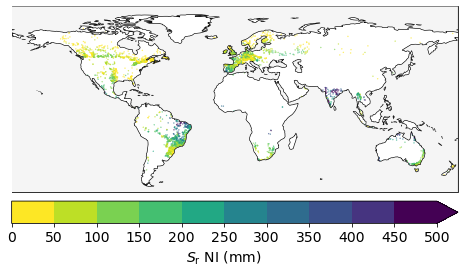

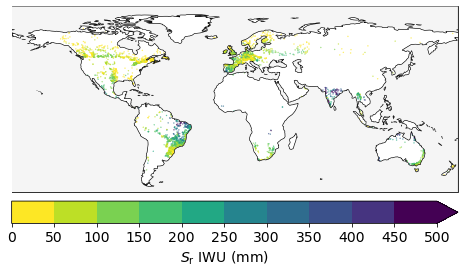

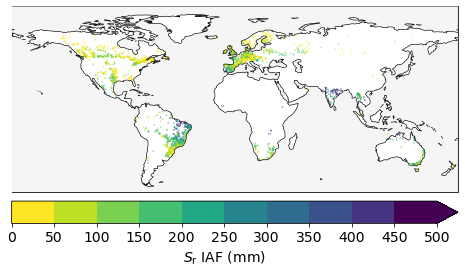

In [91]:
#shapes
sh = gpd.read_file(f'{work_dir}/output/geo_catchments_sel_area_wb.shp')
sh.index = sh.catch_id
sh['centroid'] = sh.centroid

sr_df['lat'] = sh.centroid.y
sr_df['lon'] = sh.centroid.x

bounds = np.linspace(0,500,11)
bounds2 = np.linspace(0,500,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap_vd2.N)

# no irrigation
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.2)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(sr_df.lon,sr_df.lat,c=sr_df['sr_2_f0'],s=0.1,cmap=cmap_vd2, norm=norm)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='max', pad=0.02, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=14)
cbar.set_label(label='$S_\mathrm{r}$ NI (mm)', size=14)
ax.set_title('',size=14)
fig.savefig(f'{fig_dir}/sr_map_T2_irrigation_NI.jpg',bbox_inches='tight',dpi=300)

# irrigation fiwu
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.2)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(sr_df.lon,sr_df.lat,c=sr_df['sr_2_fiwu'],s=0.1,cmap=cmap_vd2, norm=norm)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='max', pad=0.02, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=14)
cbar.set_label(label='$S_\mathrm{r}$ IWU (mm)', size=14)
fig.savefig(f'{fig_dir}/sr_map_T2_irrigation_IWU.jpg',bbox_inches='tight',dpi=300)

# irrigation fopt
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.2)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(sr_df.lon,sr_df.lat,c=sr_df['sr_2_fopt'],s=0.1,cmap=cmap_vd2, norm=norm)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='max', pad=0.02, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=14)
cbar.set_label(label='$S_\mathrm{r}$ IAF (mm)', size=14)
fig.savefig(f'{fig_dir}/sr_map_T2_irrigation_IAF.jpg',bbox_inches='tight',dpi=300)

In [92]:
#Europe
lat_min_e, lat_max_e = 35,63
lon_min_e, lon_max_e = -12,18

#Asia
lat_min_a, lat_max_a = -11,26
lon_min_a, lon_max_a = 65,120

#us
lat_min_u, lat_max_u = 20,55
lon_min_u, lon_max_u = -130,-70

#south america
lat_min_s, lat_max_s = -33,-4
lon_min_s, lon_max_s = -58,-32

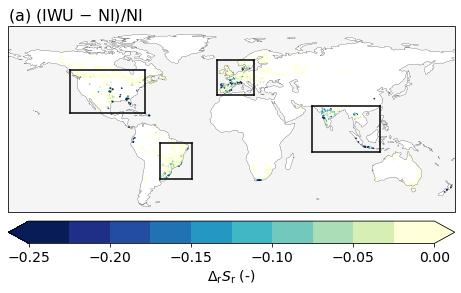

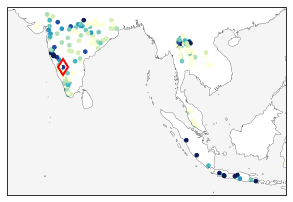

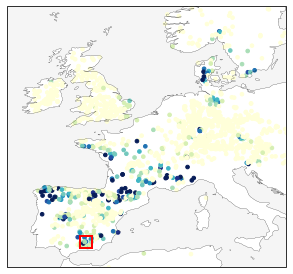

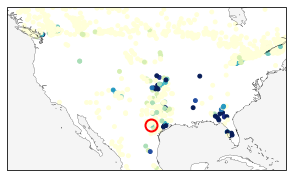

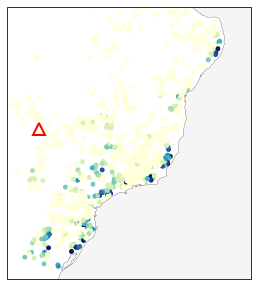

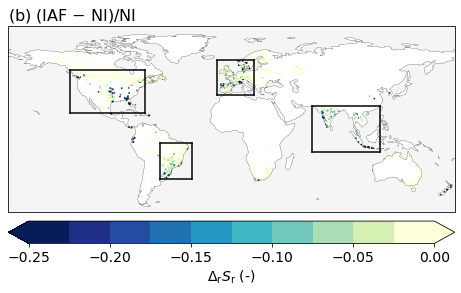

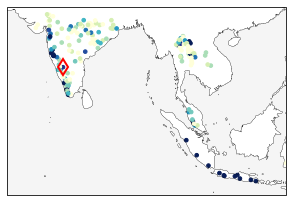

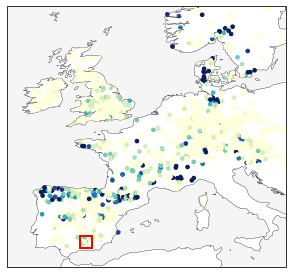

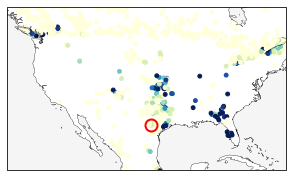

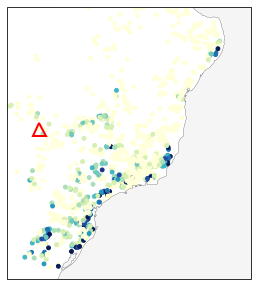

In [93]:
# RELATIVE DIFFERENCES IN SR
sh = gpd.read_file(f'{work_dir}/output/geo_catchments_sel_area_wb.shp')
sh.index = sh.catch_id
sh['centroid'] = sh.centroid

er_df['lat'] = sh.centroid.y
er_df['lon'] = sh.centroid.x

er_df_a = er_df[(er_df.lat<lat_max_a)&(er_df.lat>lat_min_a)&(er_df.lon<lon_max_a)&(er_df.lon>lon_min_a)]
er_df_e = er_df[(er_df.lat<lat_max_e)&(er_df.lat>lat_min_e)&(er_df.lon<lon_max_e)&(er_df.lon>lon_min_e)]
er_df_u = er_df[(er_df.lat<lat_max_u)&(er_df.lat>lat_min_u)&(er_df.lon<lon_max_u)&(er_df.lon>lon_min_u)]
er_df_s = er_df[(er_df.lat<lat_max_s)&(er_df.lat>lat_min_s)&(er_df.lon<lon_max_s)&(er_df.lon>lon_min_s)]

bounds = np.linspace(-0.25,0,11)
# bounds=[-0.2 , -0.18, -0.16, -0.14, -0.12, -0.1 , -0.08, -0.06, -0.04,-0.02,  0.00]
bounds2 = np.linspace(-0.25,0.0,6)
norm = mpl.colors.BoundaryNorm(bounds, cmap_ylgnbu.N)

# no irrigation vs fiwu
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.2)
ax.add_feature(cartopy.feature.OCEAN, zorder=1,facecolor='whitesmoke', edgecolor='k',linewidth=0.015)
ax.set_global()

ax.plot([lon_min_a,lon_max_a],[lat_max_a,lat_max_a],'k-',zorder=2)
ax.plot([lon_min_a,lon_max_a],[lat_min_a,lat_min_a],'k-',zorder=2)
ax.plot([lon_min_a,lon_min_a],[lat_min_a,lat_max_a],'k-',zorder=2)
ax.plot([lon_max_a,lon_max_a],[lat_min_a,lat_max_a],'k-',zorder=2)

ax.plot([lon_min_e,lon_max_e],[lat_max_e,lat_max_e],'k-')
ax.plot([lon_min_e,lon_max_e],[lat_min_e,lat_min_e],'k-')
ax.plot([lon_min_e,lon_min_e],[lat_min_e,lat_max_e],'k-')
ax.plot([lon_max_e,lon_max_e],[lat_min_e,lat_max_e],'k-')

ax.plot([lon_min_u,lon_max_u],[lat_max_u,lat_max_u],'k-')
ax.plot([lon_min_u,lon_max_u],[lat_min_u,lat_min_u],'k-')
ax.plot([lon_min_u,lon_min_u],[lat_min_u,lat_max_u],'k-')
ax.plot([lon_max_u,lon_max_u],[lat_min_u,lat_max_u],'k-')

ax.plot([lon_min_s,lon_max_s],[lat_max_s,lat_max_s],'k-')
ax.plot([lon_min_s,lon_max_s],[lat_min_s,lat_min_s],'k-')
ax.plot([lon_min_s,lon_min_s],[lat_min_s,lat_max_s],'k-')
ax.plot([lon_max_s,lon_max_s],[lat_min_s,lat_max_s],'k-')

ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(sr_df.lon,sr_df.lat,c=er_df['f0_fiwu'],s=0.5,cmap=cmap_ylgnbu,norm=norm)
# ax.annotate(f'Median: {np.round(er_df.f0_fiwu.median(),1)} %',(-170,-50),size=14)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='both', pad=0.02,norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=14)
cbar.set_label(label='$\Delta_\mathrm{r} S_\mathrm{r}$ (-)', size=14)
ax.set_title('(a) (IWU $-$ NI)/NI',loc='left',size=16)
# ax.set_title('(a) ($S_\mathrm{r}$-IWU $-$ $S_\mathrm{r}$-NI)/$S_\mathrm{r}$-NI',loc='left',size=16)
fig.savefig(f'{fig_dir}/srreldiff_map_T2_no_irrigation_fiwu.jpg',bbox_inches='tight',dpi=300)

# asia
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.2)
ax.add_feature(cartopy.feature.OCEAN, zorder=1,facecolor='whitesmoke', edgecolor='k',linewidth=0.015)
ax.set_global()
ax.set_xlim(lon_min_a,lon_max_a)
ax.set_ylim(lat_min_a,lat_max_a)
s = ax.scatter(er_df.lon,er_df.lat,c=er_df['f0_fiwu'],s=13,cmap=cmap_ylgnbu,norm=norm)
ax.plot(er_df.loc[ca10]['lon'],er_df.loc[ca10]['lat'],'d',markeredgecolor='red',markeredgewidth=2,markerfacecolor='None',markersize=12)
fig.savefig(f'{fig_dir}/srreldiff_map_T2_no_irrigation_fiwu_asia.jpg',bbox_inches='tight',dpi=300)

# EUROPE
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.2)
ax.add_feature(cartopy.feature.OCEAN, zorder=1,facecolor='whitesmoke', edgecolor='k',linewidth=0.015)
ax.set_global()
ax.set_xlim(lon_min_e,lon_max_e)
ax.set_ylim(lat_min_e,lat_max_e)
s = ax.scatter(sr_df.lon,sr_df.lat,c=er_df['f0_fiwu'],s=13,cmap=cmap_ylgnbu,norm=norm)
ax.plot(er_df.loc[ca5]['lon'],er_df.loc[ca5]['lat'],'s',markeredgecolor='red',markeredgewidth=2,markerfacecolor='None',markersize=12)
fig.savefig(f'{fig_dir}/srreldiff_map_T2_no_irrigation_fiwu_europe.jpg',bbox_inches='tight',dpi=300)

# USA
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.2)
ax.add_feature(cartopy.feature.OCEAN, zorder=1,facecolor='whitesmoke', edgecolor='k',linewidth=0.015)
ax.set_global()
ax.set_xlim(lon_min_u,lon_max_u)
ax.set_ylim(lat_min_u,lat_max_u)
s = ax.scatter(sr_df.lon,sr_df.lat,c=er_df['f0_fiwu'],s=15,cmap=cmap_ylgnbu,norm=norm)
ax.plot(er_df.loc[ca1]['lon'],er_df.loc[ca1]['lat'],'o',markeredgecolor='red',markeredgewidth=2,markerfacecolor='None',markersize=12)
fig.savefig(f'{fig_dir}/srreldiff_map_T2_no_irrigation_fiwu_us.jpg',bbox_inches='tight',dpi=300)

# SOUTH AMERICA
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.2)
ax.add_feature(cartopy.feature.OCEAN, zorder=1,facecolor='whitesmoke', edgecolor='k',linewidth=0.015)
ax.set_global()
ax.set_xlim(lon_min_s,lon_max_s)
ax.set_ylim(lat_min_s,lat_max_s)
s = ax.scatter(sr_df.lon,sr_df.lat,c=er_df['f0_fiwu'],s=15,cmap=cmap_ylgnbu,norm=norm)
ax.plot(er_df.loc[ca0]['lon'],er_df.loc[ca0]['lat'],'^',markeredgecolor='red',markeredgewidth=2,markerfacecolor='None',markersize=12)
fig.savefig(f'{fig_dir}/srreldiff_map_T2_no_irrigation_fiwu_sa.jpg',bbox_inches='tight',dpi=300)


# no irrigation vs fia
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.2)
ax.add_feature(cartopy.feature.OCEAN,zorder=1,facecolor='whitesmoke', edgecolor='k',linewidth=0.015)
ax.set_global()

ax.plot([lon_min_a,lon_max_a],[lat_max_a,lat_max_a],'k-',zorder=2)
ax.plot([lon_min_a,lon_max_a],[lat_min_a,lat_min_a],'k-',zorder=2)
ax.plot([lon_min_a,lon_min_a],[lat_min_a,lat_max_a],'k-',zorder=2)
ax.plot([lon_max_a,lon_max_a],[lat_min_a,lat_max_a],'k-',zorder=2)

ax.plot([lon_min_e,lon_max_e],[lat_max_e,lat_max_e],'k-')
ax.plot([lon_min_e,lon_max_e],[lat_min_e,lat_min_e],'k-')
ax.plot([lon_min_e,lon_min_e],[lat_min_e,lat_max_e],'k-')
ax.plot([lon_max_e,lon_max_e],[lat_min_e,lat_max_e],'k-')

ax.plot([lon_min_u,lon_max_u],[lat_max_u,lat_max_u],'k-')
ax.plot([lon_min_u,lon_max_u],[lat_min_u,lat_min_u],'k-')
ax.plot([lon_min_u,lon_min_u],[lat_min_u,lat_max_u],'k-')
ax.plot([lon_max_u,lon_max_u],[lat_min_u,lat_max_u],'k-')

ax.plot([lon_min_s,lon_max_s],[lat_max_s,lat_max_s],'k-')
ax.plot([lon_min_s,lon_max_s],[lat_min_s,lat_min_s],'k-')
ax.plot([lon_min_s,lon_min_s],[lat_min_s,lat_max_s],'k-')
ax.plot([lon_max_s,lon_max_s],[lat_min_s,lat_max_s],'k-')

ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(sr_df.lon,sr_df.lat,c=er_df['f0_fopt'],s=0.5,cmap=cmap_ylgnbu,norm=norm)
# ax.annotate(f'Median: {np.round(er_df.f0_fiwu.median(),1)} %',(-170,-50),size=14)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='both', pad=0.02,norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=14)
cbar.set_label(label='$\Delta_\mathrm{r} S_\mathrm{r}$ (-)', size=14)
ax.set_title('(b) (IAF $-$ NI)/NI',loc='left',size=16)
# ax.set_title('(b) ($S_\mathrm{r}$-IAF $-$ $S_\mathrm{r}$-NI)/$S_\mathrm{r}$-NI',loc='left',size=16)
fig.savefig(f'{fig_dir}/srreldiff_map_T2_no_irrigation_fia.jpg',bbox_inches='tight',dpi=300)

# asia
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.2)
ax.add_feature(cartopy.feature.OCEAN, zorder=1,facecolor='whitesmoke', edgecolor='k',linewidth=0.15)
ax.set_global()
ax.set_xlim(lon_min_a,lon_max_a)
ax.set_ylim(lat_min_a,lat_max_a)
s = ax.scatter(er_df.lon,er_df.lat,c=er_df['f0_fopt'],s=13,cmap=cmap_ylgnbu,norm=norm)
ax.plot(er_df.loc[ca10]['lon'],er_df.loc[ca10]['lat'],'d',markeredgecolor='red',markeredgewidth=2,markerfacecolor='None',markersize=12)
fig.savefig(f'{fig_dir}/srreldiff_map_T2_no_irrigation_fia_asia.jpg',bbox_inches='tight',dpi=300)

# EUROPE
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.2)
ax.add_feature(cartopy.feature.OCEAN, zorder=1,facecolor='whitesmoke', edgecolor='k',linewidth=0.15)
ax.set_global()
ax.set_xlim(lon_min_e,lon_max_e)
ax.set_ylim(lat_min_e,lat_max_e)
s = ax.scatter(sr_df.lon,sr_df.lat,c=er_df['f0_fopt'],s=13,cmap=cmap_ylgnbu,norm=norm)
ax.plot(er_df.loc[ca5]['lon'],er_df.loc[ca5]['lat'],'s',markeredgecolor='red',markeredgewidth=2,markerfacecolor='None',markersize=12)
fig.savefig(f'{fig_dir}/srreldiff_map_T2_no_irrigation_fia_europe.jpg',bbox_inches='tight',dpi=300)

# USA
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.2)
ax.add_feature(cartopy.feature.OCEAN, zorder=1,facecolor='whitesmoke', edgecolor='k',linewidth=0.15)
ax.set_global()
ax.set_xlim(lon_min_u,lon_max_u)
ax.set_ylim(lat_min_u,lat_max_u)
s = ax.scatter(sr_df.lon,sr_df.lat,c=er_df['f0_fopt'],s=15,cmap=cmap_ylgnbu,norm=norm)
ax.plot(er_df.loc[ca1]['lon'],er_df.loc[ca1]['lat'],'o',markeredgecolor='red',markeredgewidth=2,markerfacecolor='None',markersize=12)
fig.savefig(f'{fig_dir}/srreldiff_map_T2_no_irrigation_fia_us.jpg',bbox_inches='tight',dpi=300)

# SOUTH AMERICA
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.2)
ax.add_feature(cartopy.feature.OCEAN, zorder=1,facecolor='whitesmoke', edgecolor='k',linewidth=0.015)
ax.set_global()
ax.set_xlim(lon_min_s,lon_max_s)
ax.set_ylim(lat_min_s,lat_max_s)
s = ax.scatter(sr_df.lon,sr_df.lat,c=er_df['f0_fopt'],s=15,cmap=cmap_ylgnbu,norm=norm)
ax.plot(er_df.loc[ca0]['lon'],er_df.loc[ca0]['lat'],'^',markeredgecolor='red',markeredgewidth=2,markerfacecolor='None',markersize=13)
fig.savefig(f'{fig_dir}/srreldiff_map_T2_no_irrigation_fia_sa.jpg',bbox_inches='tight',dpi=300)


## CHECK VANCOUVER ISLAND

Text(0.5, 1.0, '($S_\\mathrm{r}$-NI $-$ $S_\\mathrm{r}$-IAF) / $S_\\mathrm{r}$-NI (-)')

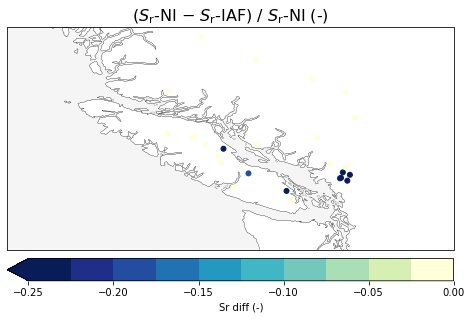

In [57]:
er_df_us = er_df[(er_df.lat<(lat_max_u))&(er_df.lat>(lat_min_u+25))&(er_df.lon<(lon_max_u-52))&(er_df.lon>lon_min_u)]

# USA
bounds = np.linspace(-0.25,0,11)
# bounds=[-0.2 , -0.18, -0.16, -0.14, -0.12, -0.1 , -0.08, -0.06, -0.04,-0.02,  0.00]
bounds2 = np.linspace(-0.25,0.0,6)
norm = mpl.colors.BoundaryNorm(bounds, cmap_ylgnbu.N)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.2)
ax.add_feature(cartopy.feature.OCEAN, zorder=1,facecolor='whitesmoke', edgecolor='k',linewidth=0.15)
ax.set_global()
ax.set_xlim(lon_min_u,lon_max_u-50)
ax.set_ylim(lat_min_u+30,lat_max_u-5)
s = ax.scatter(er_df_us.lon,er_df_us.lat,c=er_df_us['f0_fopt'],s=25,cmap=cmap_ylgnbu,norm=norm)
cbar = plt.colorbar(s, orientation='horizontal', label='Sr diff (-)',spacing='proportional',extend='min', pad=0.02,norm=norm,ticks=bounds2)
ax.set_title('($S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IAF) / $S_\mathrm{r}$-NI (-)',size=16)
# ax.annotate(f'Median: {np.round(er_df_u.f0_fiwu.median(),1)} %',(-128,23),size=14)
# cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='both', pad=0.02,norm=norm,ticks=bounds2)
# cbar.ax.tick_params(labelsize=14)
# ax.set_title('$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IWU (mm)',size=16)

Text(0.5, 1.0, '($S_\\mathrm{r}$-NI $-$ $S_\\mathrm{r}$-IAF) (mm)')

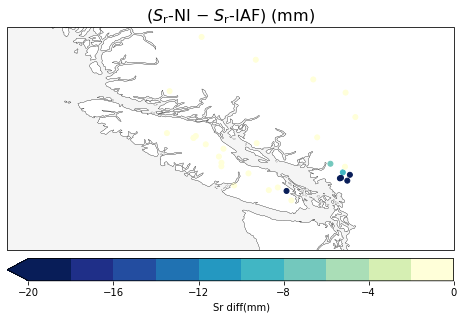

In [58]:
e_df['lat'] = sh.centroid.y
e_df['lon'] = sh.centroid.x

e_df_us = e_df[(e_df.lat<(lat_max_u))&(e_df.lat>(lat_min_u+25))&(e_df.lon<(lon_max_u-52))&(e_df.lon>lon_min_u)]

# USA
bounds = np.linspace(-20,0,11)
# bounds=[-0.2 , -0.18, -0.16, -0.14, -0.12, -0.1 , -0.08, -0.06, -0.04,-0.02,  0.00]
bounds2 = np.linspace(-20,0.0,6)
norm = mpl.colors.BoundaryNorm(bounds, cmap_ylgnbu.N)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.2)
ax.add_feature(cartopy.feature.OCEAN, zorder=1,facecolor='whitesmoke', edgecolor='k',linewidth=0.15)
ax.set_global()
ax.set_xlim(lon_min_u,lon_max_u-50)
ax.set_ylim(lat_min_u+30,lat_max_u-5)
s = ax.scatter(e_df_us.lon,e_df_us.lat,c=e_df_us['f0_fopt'],s=25,cmap=cmap_ylgnbu,norm=norm)
cbar = plt.colorbar(s, orientation='horizontal', label='Sr diff(mm)',spacing='proportional',extend='min', pad=0.02,norm=norm,ticks=bounds2)
ax.set_title('($S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IAF) (mm)',size=16)

# ax.annotate(f'Median: {np.round(er_df_u.f0_fiwu.median(),1)} %',(-128,23),size=14)
# cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='both', pad=0.02,norm=norm,ticks=bounds2)
# cbar.ax.tick_params(labelsize=14)
# ax.set_title('$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IWU (mm)',size=16)

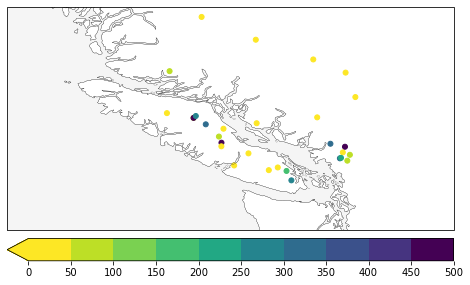

In [59]:
sr_df_us = sr_df[(sr_df.lat<(lat_max_u))&(sr_df.lat>(lat_min_u+25))&(sr_df.lon<(lon_max_u-52))&(sr_df.lon>lon_min_u)]

bounds = np.linspace(0,500,11)
bounds2 = np.linspace(0,500,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap_vd2.N)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.2)
ax.add_feature(cartopy.feature.OCEAN, zorder=1,facecolor='whitesmoke', edgecolor='k',linewidth=0.15)
ax.set_global()
ax.set_xlim(lon_min_u,lon_max_u-50)
ax.set_ylim(lat_min_u+30,lat_max_u-5)
s = ax.scatter(sr_df_us.lon,sr_df_us.lat,c=sr_df_us['sr_2_f0'],s=25,cmap=cmap_vd2,norm=norm)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='min', pad=0.02,norm=norm,ticks=bounds2)


In [60]:
sr_df_us = sr_df[(sr_df.lat<(lat_max_u))&(sr_df.lat>(lat_min_u+25))&(sr_df.lon<(lon_max_u-52))&(sr_df.lon>lon_min_u)]
# sr_df_us

In [61]:
er_df_us = er_df[(er_df.lat<(lat_max_u))&(er_df.lat>(lat_min_u+25))&(er_df.lon<(lon_max_u-52))&(er_df.lon>lon_min_u)]
er_df_us[er_df_us['f0_fopt']<-0.1]

,f0_fiwu,f0_fopt,fopt_fiwu,lat,lon
ca_0005053,-0.6000,-0.4000,-0.3333,49.233725,-122.481443
ca_0005063,-0.3836,-0.5753,0.4516,49.179631,-122.323392
ca_0005062,-0.0710,-0.2099,0.1758,49.100570,-122.547024
ca_0004234,0.0000,-0.5000,1.0000,49.763884,-125.155025
ca_0005090,-0.3372,-0.7093,1.2800,49.048276,-122.380840
ca_0005068,-0.1148,-0.3828,0.4341,49.111140,-122.522688
ca_0004185,0.0000,-0.3793,0.6111,48.817976,-123.742676
ca_0004227,0.0000,-0.2000,0.2500,49.211669,-124.595290


In [62]:
ct = ['ca_0005090','ca_0005063','ca_0005053','ca_0005068','ca_0004227','ca_0004185','ca_0004234','ca_0005062']
sr_df_u2 = sr_df.loc[ct]
sr_df_u2

,sr_2_f0,sr_2_fiwu,sr_2_fopt,lat,lon
ca_0005090,86,57,25,49.048276,-122.380840
ca_0005063,73,45,31,49.179631,-122.323392
ca_0005053,25,10,15,49.233725,-122.481443
ca_0005068,209,185,129,49.111140,-122.522688
ca_0004227,5,5,4,49.211669,-124.595290
ca_0004185,174,174,108,48.817976,-123.742676
ca_0004234,2,2,1,49.763884,-125.155025
ca_0005062,324,301,256,49.100570,-122.547024


In [63]:
er_df_u2 = er_df.loc[ct]
er_df_u2

,f0_fiwu,f0_fopt,fopt_fiwu,lat,lon
ca_0005090,-0.3372,-0.7093,1.2800,49.048276,-122.380840
ca_0005063,-0.3836,-0.5753,0.4516,49.179631,-122.323392
ca_0005053,-0.6000,-0.4000,-0.3333,49.233725,-122.481443
ca_0005068,-0.1148,-0.3828,0.4341,49.111140,-122.522688
ca_0004227,0.0000,-0.2000,0.2500,49.211669,-124.595290
ca_0004185,0.0000,-0.3793,0.6111,48.817976,-123.742676
ca_0004234,0.0000,-0.5000,1.0000,49.763884,-125.155025
ca_0005062,-0.0710,-0.2099,0.1758,49.100570,-122.547024


In [64]:
e_df_u2 = e_df.loc[ct]
e_df_u2

,f0_fiwu,f0_fopt,fopt_fiwu,lat,lon
ca_0005090,-29,-61,32,49.048276,-122.380840
ca_0005063,-28,-42,14,49.179631,-122.323392
ca_0005053,-15,-10,-5,49.233725,-122.481443
ca_0005068,-24,-80,56,49.111140,-122.522688
ca_0004227,0,-1,1,49.211669,-124.595290
ca_0004185,0,-66,66,48.817976,-123.742676
ca_0004234,0,-1,1,49.763884,-125.155025
ca_0005062,-23,-68,45,49.100570,-122.547024


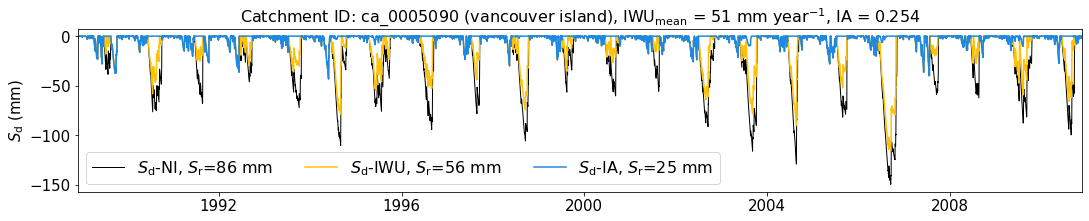

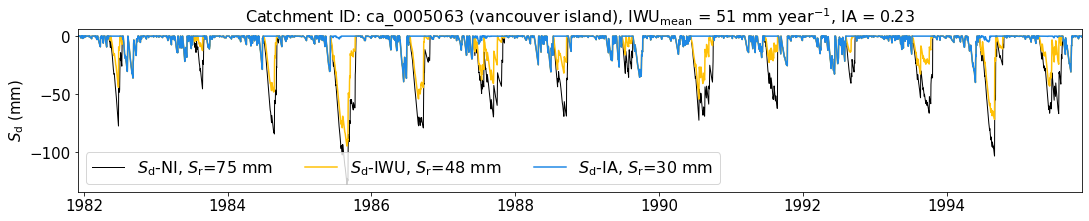

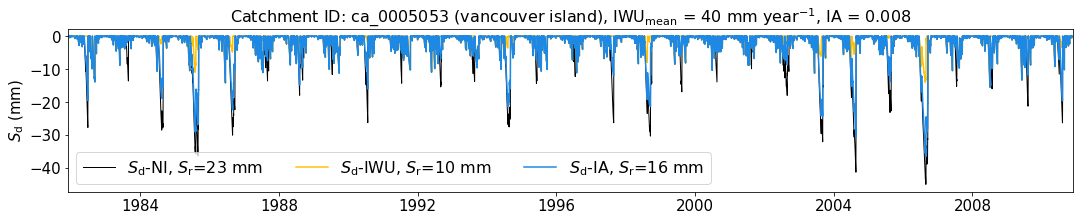

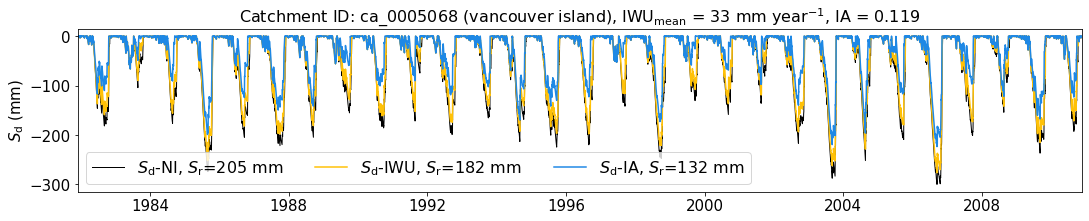

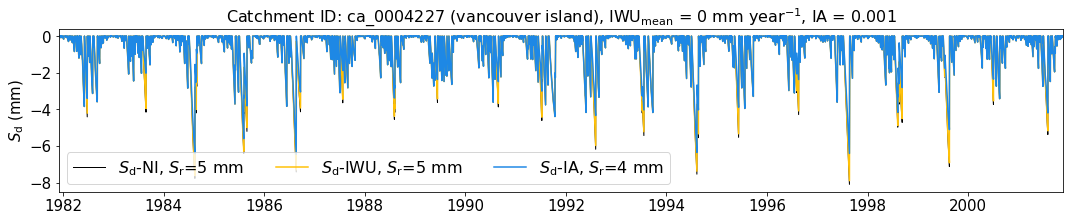

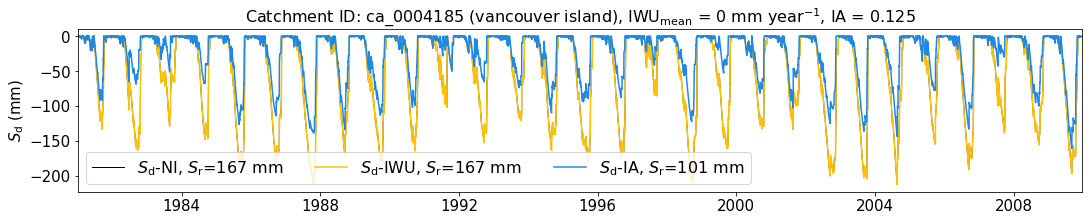

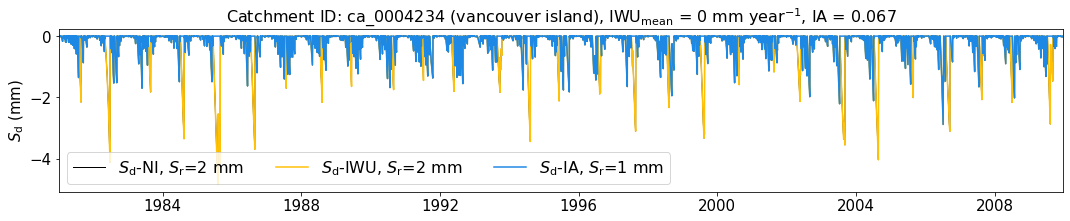

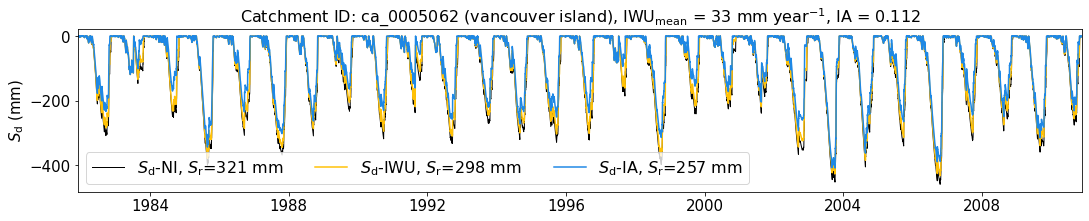

In [65]:
for i in ct:
    plot_sd_timeseries(i, f'{i} (vancouver island)')

(47.5, 52.5)

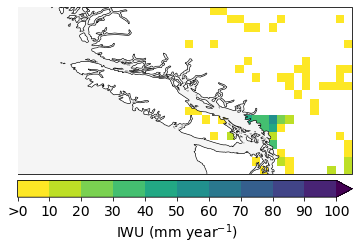

In [73]:
lvls = np.linspace(0,100,11) 
lvls2 = np.linspace(0,100,11) 
cmapv = plt.cm.viridis_r  # define the colormap

z = iwu2m.where(iwu2m==0)

# fig with stats
fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.2)
ax.set_global()
cf = iwu2m.plot(ax=ax, cmap=cmapv, add_colorbar=False, vmin=0, vmax=5, levels=lvls)#plot all points
cf3 = z.plot(ax=ax, cmap=cmap_grey, add_colorbar=False, vmin=0, vmax=5, levels=[0,1])
cbar = plt.colorbar(cf, orientation='horizontal',extend='max', pad=0.02, ticks=lvls2)
cbar.ax.tick_params(labelsize=14)
cbar.ax.set_xticklabels(['>0','10','20','30','40','50','60','70','80','90','100'])
cbar.set_label(label='IWU ($\mathrm{mm}$ $\mathrm{year}^{-1}$)', size=14)
ax.set_title(f'',size=14)
ax.set_xlim(lon_min_u,lon_max_u-50)
ax.set_ylim(lat_min_u+30,lat_max_u-5)


(47.5, 52.5)

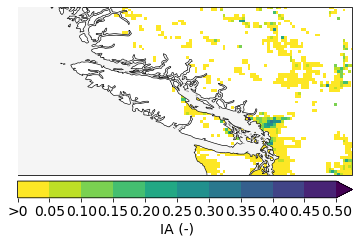

In [74]:
lvls = np.linspace(0,0.5,11) 
lvls2 = np.linspace(0,0.5,11) 
cmapv = plt.cm.viridis_r  # define the colormap

z = ia.where(ia==0)

# fig with stats
fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.2)
ax.set_global()
cf = ia.plot(ax=ax, cmap=cmapv, add_colorbar=False, vmin=0, vmax=5, levels=lvls)#plot all points
cf3 = z.plot(ax=ax, cmap=cmap_grey, add_colorbar=False, vmin=0, vmax=5, levels=[0,1])
cbar = plt.colorbar(cf, orientation='horizontal',extend='max', pad=0.02, ticks=lvls2)
cbar.ax.tick_params(labelsize=14)
cbar.ax.set_xticklabels(['>0','0.05','0.10','0.15','0.20','0.25','0.30','0.35','0.40','0.45','0.50'])
cbar.set_label(label='IA (-)', size=14)
ax.set_title(f'',size=12)
ax.set_xlim(lon_min_u,lon_max_u-50)
ax.set_ylim(lat_min_u+30,lat_max_u-5)

In [75]:
cc = pd.read_csv(f'{work_dir}/output/catchment_characteristics/catchment_characteristics_gswp-p_gleam-ep_gswp-t.csv',index_col=0)
sr_df['area'] = cc.area
sr_df.loc[ct]

,sr_2_f0,sr_2_fiwu,sr_2_fopt,lat,lon,area
ca_0005090,86,57,25,49.048276,-122.380840,18.2150
ca_0005063,73,45,31,49.179631,-122.323392,17.4660
ca_0005053,25,10,15,49.233725,-122.481443,45.5015
ca_0005068,209,185,129,49.111140,-122.522688,11.3246
ca_0004227,5,5,4,49.211669,-124.595290,140.1641
ca_0004185,174,174,108,48.817976,-123.742676,16.8855
ca_0004234,2,2,1,49.763884,-125.155025,243.9881
ca_0005062,324,301,256,49.100570,-122.547024,51.0222


In [76]:
sr_df_small = sr_df[sr_df.area<100]

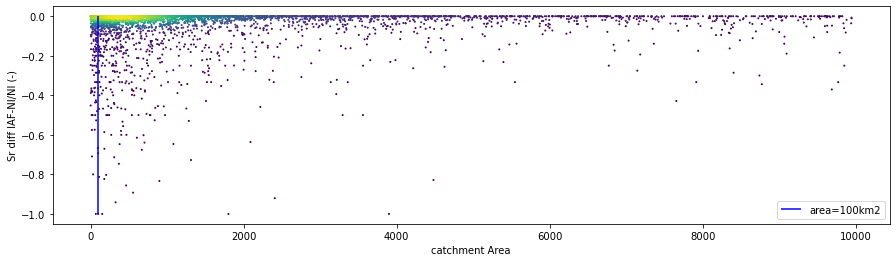

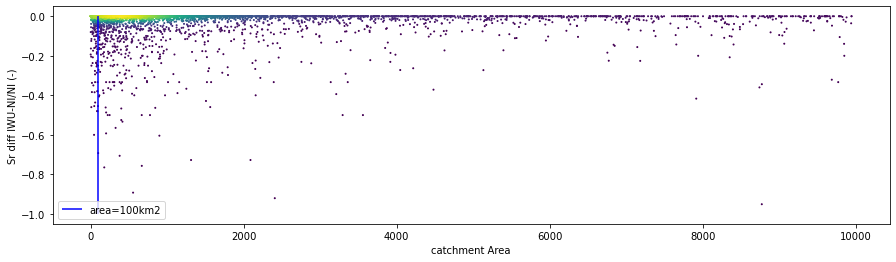

In [77]:
er_df['area'] = cc.area
er_df = er_df.dropna()

x = er_df['area']
y = er_df['f0_fopt']
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(111)
ax.scatter(x,y,c=z,s=1)
ax.vlines(100,-1,0,color='b',label='area=100km2')
ax.set_ylabel('Sr diff IAF-NI/NI (-)')
ax.set_xlabel('catchment Area')
ax.legend()

x = er_df['area']
y = er_df['f0_fiwu']
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(111)
ax.scatter(x,y,c=z,s=1)
ax.vlines(100,-1,0,color='b',label='area=100km2')
ax.set_ylabel('Sr diff IWU-NI/NI (-)')
ax.set_xlabel('catchment Area')
ax.legend()

Text(0.5, 1.0, 'catchment Area')

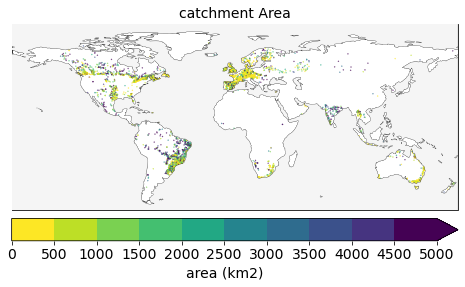

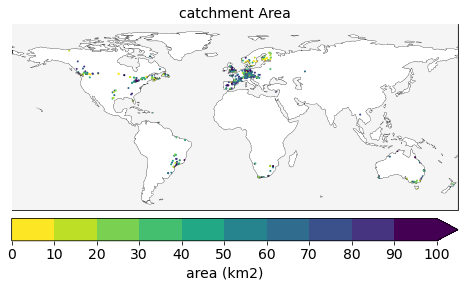

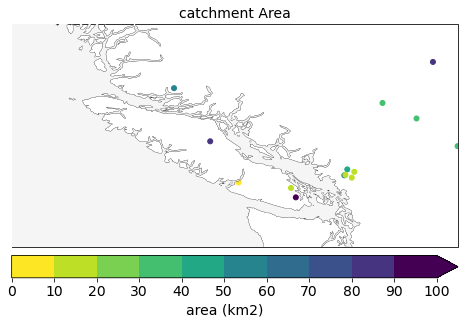

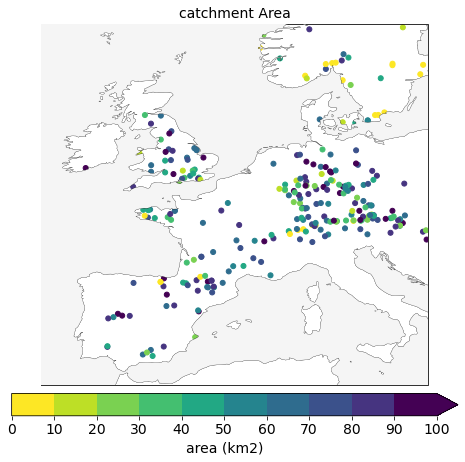

In [78]:
bounds = np.linspace(0,5000,11)
bounds2 = np.linspace(0,5000,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap_vd2.N)

# no irrigation
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.2)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.2)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(sr_df.lon,sr_df.lat,c=sr_df['area'],s=0.1,cmap=cmap_vd2, norm=norm)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='max', pad=0.02, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=14)
cbar.set_label(label='area (km2)', size=14)
ax.set_title('catchment Area',size=14)

bounds = np.linspace(0,100,11)
bounds2 = np.linspace(0,100,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap_vd2.N)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.2)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.2)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(sr_df_small.lon,sr_df_small.lat,c=sr_df_small['area'],s=1,cmap=cmap_vd2, norm=norm)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='max', pad=0.02, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=14)
cbar.set_label(label='area (km2)', size=14)
ax.set_title('catchment Area',size=14)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.2)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.2)
ax.set_global()
ax.set_xlim(lon_min_u,lon_max_u-50)
ax.set_ylim(lat_min_u+30,lat_max_u-5)
s = ax.scatter(sr_df_small.lon,sr_df_small.lat,c=sr_df_small['area'],s=25,cmap=cmap_vd2, norm=norm)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='max', pad=0.02, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=14)
cbar.set_label(label='area (km2)', size=14)
ax.set_title('catchment Area',size=14)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.2)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.2)
ax.set_global()
ax.set_xlim(lon_min_e,lon_max_e)
ax.set_ylim(lat_min_e,lat_max_e)
s = ax.scatter(sr_df_small.lon,sr_df_small.lat,c=sr_df_small['area'],s=25,cmap=cmap_vd2, norm=norm)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='max', pad=0.02, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=14)
cbar.set_label(label='area (km2)', size=14)
ax.set_title('catchment Area',size=14)


## IA STRATIFICATION

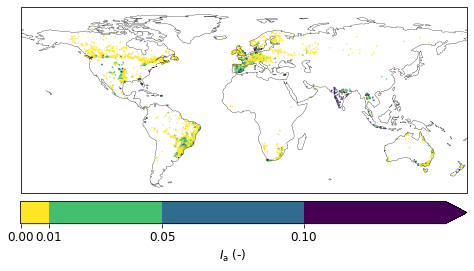

In [94]:
# combine Sr output in dataframe
sr_df_ni = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sr_no_irri_combined_points.csv', index_col=0)
sr_df_f09ia = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sr_irri_f0.9ia_combined_points.csv', index_col=0)
sr_df_fiwu2 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sr_irri_fiwu2_combined_points.csv', index_col=0)

sr_df = pd.DataFrame(index=sr_df_ni.index)
sr_df['sr_2_f0'] = sr_df_ni['k3']
sr_df['sr_2_fiwu'] = sr_df_fiwu2['k3']
sr_df['sr_2_fopt'] = sr_df_f09ia['k3']

sr_df = sr_df.astype(int) #int values
                
sr_df = sr_df.dropna()

# dataframes with errors
f0_iwu_e = np.round(sr_df.sr_2_fiwu-sr_df.sr_2_f0,3)
f0_opt_e = np.round(sr_df.sr_2_fopt-sr_df.sr_2_f0,3)
fopt_iwu_e = np.round(sr_df.sr_2_fiwu-sr_df.sr_2_fopt,3)

f0_iwu_er = np.round((sr_df.sr_2_fiwu-sr_df.sr_2_f0)/sr_df.sr_2_f0 ,4)
f0_opt_er = np.round((sr_df.sr_2_fopt-sr_df.sr_2_f0)/sr_df.sr_2_f0 ,4)
fopt_iwu_er = np.round((sr_df.sr_2_fiwu-sr_df.sr_2_fopt)/sr_df.sr_2_fopt ,4) 

e_df = pd.DataFrame(index=sr_df.index, columns=['f0_fiwu','f0_fopt','fopt_fiwu'])
e_df['f0_fiwu'] = f0_iwu_e
e_df['f0_fopt'] = f0_opt_e
e_df['fopt_fiwu'] = fopt_iwu_e

er_df = pd.DataFrame(index=sr_df.index, columns=['f0_fiwu','f0_fopt','fopt_fiwu'])
er_df['f0_fiwu'] = f0_iwu_er
er_df['f0_fopt'] = f0_opt_er
er_df['fopt_fiwu'] = fopt_iwu_er

# drop pos catchments
# ix_drop = ['us_0006081','br_0000699','za_0000167','us_0005876','us_0004753','ca_0000774'] #catchments with sr increasing with irri compared to no-irri
# sr_df = sr_df.drop(index=ix_drop)
# e_df = e_df.drop(index=ix_drop)
# er_df = er_df.drop(index=ix_drop)

# MAKE MAP OF AI
ir2 = pd.read_csv(f'{work_dir}/data/irrigated_area/output/combined_ia.csv',index_col=0) 
ir = ir2.hi

cc = pd.read_csv(f'{work_dir}/output/catchment_characteristics/catchment_characteristics_gswp-p_gleam-ep_gswp-t.csv',index_col=0)
cc = cc.loc[e_df.index]

ir2['lat'] = cc.lat
ir2['lon'] = cc.lon

ir2 = ir2.loc[e_df.index]
ir = ir2.hi

bounds = [0,0.0100001,0.0500001,0.100001,0.15]
bounds2 =[0,0.01,0.05,0.1]
norm = mpl.colors.BoundaryNorm(bounds, cmap_vd2.N)

# no irrigation
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(cc.lon,cc.lat,c=(ir),s=0.2,cmap=cmap_vd2, norm=norm)
cbar = plt.colorbar(s, orientation='horizontal',spacing='proportional',extend='max', pad=0.02, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=12)
cbar.set_label(label='$I_\mathrm{a}$ (-)', size=12)
fig.savefig(f'{fig_dir}/ia_map.jpg',bbox_inches='tight',dpi=300)

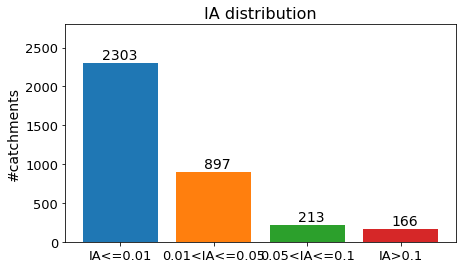

In [95]:
# boxplots of absolute errors between different Sr
e_df = e_df.dropna()
er_df = er_df.dropna()
e_df=e_df.iloc[:,0:2]
er_df=er_df.iloc[:,0:2]

#abs - IA bins
e_df0 = e_df[(ir>0)&(ir<=0.01)]
e_df1 = e_df[(ir>0.01)&(ir<=0.05)]
e_df5 = e_df[(ir>0.05)&(ir<=0.1)]
e_df10 = e_df[(ir>0.1)]

#rel - IA bins
er_df0 = er_df[(ir>0)&(ir<=0.01)]
er_df1 = er_df[(ir>0.01)&(ir<=0.05)]
er_df5 = er_df[(ir>0.05)&(ir<=0.1)]
er_df10 = er_df[(ir>0.1)]

# histogram with #catchments
fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(111)
ax.bar(0,e_df0.count()[0])
ax.bar(1,e_df1.count()[0])
ax.bar(2,e_df5.count()[0])
ax.bar(3,e_df10.count()[0])
ax.annotate(f'{e_df0.count()[0]}',(-0.2,e_df0.count()[0]+50),size=14)
ax.annotate(f'{e_df1.count()[0]}',(0.9,e_df1.count()[0]+50),size=14)
ax.annotate(f'{e_df5.count()[0]}',(1.9,e_df5.count()[0]+50),size=14)
ax.annotate(f'{e_df10.count()[0]}',(2.9,e_df10.count()[0]+50),size=14)
ax.set_ylim(0,2800)
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['IA<=0.01','0.01<IA<=0.05','0.05<IA<=0.1','IA>0.1'])
ax.tick_params(axis='both', which='major', labelsize=13)
ax.set_ylabel(f'#catchments',size=14)
ax.set_title(f'IA distribution',size=16)
fig.savefig(f'{work_dir}/output/figures/irrigation/histogram_bins.jpg', dpi=300, bbox_inches='tight')



In [36]:
ca1 = 'br_0002791'
ca2 = 'us_0006399'
ca3 = 'es_0000742'
ca4 = 'in_0000134'

In [97]:
# set sr diff values <-100 to -100 for plotting
e_df0.loc['fr_0000727']['f0_fopt'] = -100
e_df5.loc['in_0000053']['f0_fopt'] = -100
e_df5.loc['in_0000281']['f0_fopt'] = -100
e_df10.loc['in_0000026']['f0_fiwu'] = -100
e_df10.loc['id_0000009']['f0_fopt'] = -100
e_df10.loc['in_0000117']['f0_fopt'] = -100
e_df10.loc['in_0000052']['f0_fopt'] = -100
e_df10.loc['id_0000009']['f0_fopt'] = -100

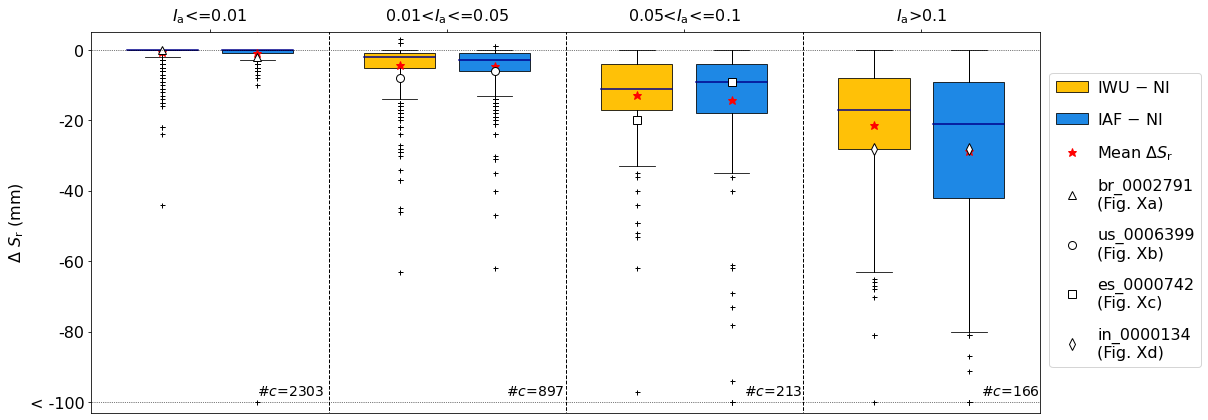

In [99]:
boxprops1 = dict(facecolor=c3,color="black",linewidth=0.8)
boxprops2 = dict(facecolor=c2,color="black",linewidth=0.8)
medianprops = dict(color="darkblue",linewidth=1.5)
# meanpointprops = dict(marker='^', markeredgecolor='black',markerfacecolor='white',markersize=7.5)
meanpointprops = dict(marker='*', markeredgecolor='red',markerfacecolor='red',linestyle='None',markersize=9)

flierprops = dict(color='black',marker='+',markersize=5)
capprops = dict(linestyle='-', linewidth=0.8, color='Black')

# boxplot of Sr differences - ABS
fig = plt.figure(figsize=(17,7))
p1 = ax.plot(1,-200, marker='*', markeredgecolor='red',markerfacecolor='red',linestyle='None',markersize=9)
p2 = ax.plot(1,-200,marker='^',linestyle='None', markeredgecolor='black',markerfacecolor='white',markersize=8)
p3 = ax.plot(1,-200,marker='o',linestyle='None', markeredgecolor='black',markerfacecolor='white',markersize=8)
p4 = ax.plot(1,-200,marker='s',linestyle='None', markeredgecolor='black',markerfacecolor='white',markersize=8)
p5 = ax.plot(1,-200,marker='d',linestyle='None', markeredgecolor='black',markerfacecolor='white',markersize=8)
p0 = ax.plot(1,-200,marker='^',linestyle='None', markeredgecolor='white',markerfacecolor='white',markersize=8)

ax = fig.add_subplot(111)
plt.subplots_adjust(wspace=0.05)
ax.boxplot(e_df0.iloc[:,0],positions=[1.1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.boxplot(e_df0.iloc[:,1],positions=[1.9],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.plot([1.1,1.9],e_df0.loc[ca1].values,marker='^',linestyle='None', markeredgecolor='black',markerfacecolor='white',markersize=8,zorder=1)

ax.boxplot(e_df1.iloc[:,0],positions=[3.1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.boxplot(e_df1.iloc[:,1],positions=[3.9],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.plot([3.1,3.9],e_df1.loc[ca2].values,marker='o',linestyle='None', markeredgecolor='black',markerfacecolor='white',markersize=8,zorder=1)

ax.boxplot(e_df5.iloc[:,0],positions=[5.1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.boxplot(e_df5.iloc[:,1],positions=[5.9],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.plot([5.1,5.9],e_df5.loc[ca3].values,marker='s',linestyle='None', markeredgecolor='black',markerfacecolor='white',markersize=8,zorder=1)

bp1=ax.boxplot(e_df10.iloc[:,0],positions=[7.1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
bp2=ax.boxplot(e_df10.iloc[:,1],positions=[7.9],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.plot([7.1,7.9],e_df10.loc[ca4].values,marker='d',linestyle='None', markeredgecolor='black',markerfacecolor='white',markersize=8,zorder=1)
ax.set_ylim(-103,5)
ax.set_xlim(0.5,8.5)
ax.set_xticks([1.5,3.5,5.5,7.5])
ax.set_yticks([0,-20,-40,-60,-80,-100])
ax.set_yticklabels([0,-20,-40,-60,-80,'< -100'])
ax.set_xticklabels(['$I_\mathrm{a}$<=0.01','0.01<$I_\mathrm{a}$<=0.05','0.05<$I_\mathrm{a}$<=0.1','$I_\mathrm{a}$>0.1'],size=18)
ax.xaxis.set_tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)

ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=16)

ax.hlines(0,0,10,color='k',linestyle=':',linewidth=0.7)
ax.hlines(-100,0,10,color='k',linestyle=':',linewidth=0.7)
ax.vlines(2.5,-200,20,color='k',linestyle='--',linewidth=1)
ax.vlines(4.5,-200,20,color='k',linestyle='--',linewidth=1)
ax.vlines(6.5,-200,20,color='k',linestyle='--',linewidth=1)

ax.annotate('#$c$='+str(e_df0.count()[0]),(1.9,-98),size=14)
ax.annotate('#$c$='+str(e_df1.count()[0]),(4.0,-98),size=14)
ax.annotate('#$c$='+str(e_df5.count()[0]),(6.0,-98),size=14)
ax.annotate('#$c$='+str(e_df10.count()[0]),(8.0,-98),size=14)

# ax.legend([bp1["boxes"][0], bp2["boxes"][0]],['IWU $-$ NI','IAF $-$ NI'],ncol=1,fontsize= 17,loc='lower left',handletextpad=0.8,columnspacing = 0.5)


ax.legend([bp1["boxes"][0], bp2["boxes"][0],p1[0],p2[0],p3[0],p4[0],p5[0]],
          ['IWU $-$ NI','IAF $-$ NI','Mean $\Delta$$S_\mathrm{r}$',
           '\n'.join(wrap(f'{ca1} (Fig. Xa)', 10)),'\n'.join(wrap(f'{ca2} (Fig. Xb)', 10)),'\n'.join(wrap(f'{ca3} (Fig. Xc)', 10)),'\n'.join(wrap(f'{ca4} (Fig. Xd)', 10))],
          ncol=1,fontsize= 16,loc='lower center',bbox_to_anchor=(1.09, 0.10),handletextpad=0.6,labelspacing=1,columnspacing = 0.5)

fig.savefig(f'{fig_dir}/box_abs_diff_ia.jpg', dpi=300, bbox_inches='tight')


In [100]:
d = pd.DataFrame(index=['$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI','$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI'])
d['med0']=np.round(e_df0.median(),2).values
d['std0']=np.round(e_df0.std(),2).values

d['med1']=np.round(e_df1.median(),2).values
d['std1']=np.round(e_df1.std(),2).values

d['med5']=np.round(e_df5.median(),2).values
d['std5']=np.round(e_df5.std(),2).values

d['med10']=np.round(e_df10.median(),2).values
d['std10']=np.round(e_df10.std(),2).values

d

,med0,std0,med1,std1,med5,std5,med10,std10
$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI,0.0,1.74,-2.0,5.75,-11.0,12.51,-17.0,18.72
$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI,0.0,2.37,-3.0,5.20,-9.0,17.07,-21.0,25.84


## STRATIFY REGIONS

In [155]:
# combine Sr output in dataframe
sr_df_ni = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sr_no_irri_combined_points.csv', index_col=0)
sr_df_f09ia = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sr_irri_f0.9ia_combined_points.csv', index_col=0)
sr_df_fiwu2 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sr_irri_fiwu2_combined_points.csv', index_col=0)

sr_df = pd.DataFrame(index=sr_df_ni.index)
sr_df['sr_2_f0'] = sr_df_ni['k3']
sr_df['sr_2_fiwu'] = sr_df_fiwu2['k3']
sr_df['sr_2_fopt'] = sr_df_f09ia['k3']

# sr_df = sr_df.astype(int) #int values
                
sr_df = sr_df.dropna()

# dataframes with errors
f0_iwu_e = np.round(sr_df.sr_2_fiwu-sr_df.sr_2_f0,3)
f0_opt_e = np.round(sr_df.sr_2_fopt-sr_df.sr_2_f0,3)
fopt_iwu_e = np.round(sr_df.sr_2_fiwu-sr_df.sr_2_fopt,3)

f0_iwu_er = np.round((sr_df.sr_2_fiwu-sr_df.sr_2_f0)/sr_df.sr_2_f0 ,4)
f0_opt_er = np.round((sr_df.sr_2_fopt-sr_df.sr_2_f0)/sr_df.sr_2_f0 ,4)
fopt_iwu_er = np.round((sr_df.sr_2_fiwu-sr_df.sr_2_fopt)/sr_df.sr_2_fopt ,4) 

e_df = pd.DataFrame(index=sr_df.index, columns=['f0_fiwu','f0_fopt','fopt_fiwu'])
e_df['f0_fiwu'] = f0_iwu_e
e_df['f0_fopt'] = f0_opt_e
e_df['fopt_fiwu'] = fopt_iwu_e

er_df = pd.DataFrame(index=sr_df.index, columns=['f0_fiwu','f0_fopt','fopt_fiwu'])
er_df['f0_fiwu'] = f0_iwu_er
er_df['f0_fopt'] = f0_opt_er
er_df['fopt_fiwu'] = fopt_iwu_er

# drop pos catchments
# ix_drop = ['us_0006081','br_0000699','za_0000167','us_0005876','us_0004753','ca_0000774'] #catchments with sr increasing with irri compared to no-irri
# sr_df = sr_df.drop(index=ix_drop)
# e_df = e_df.drop(index=ix_drop)
# er_df = er_df.drop(index=ix_drop)

# MAKE MAP OF AI
ir2 = pd.read_csv(f'{work_dir}/data/irrigated_area/output/combined_ia.csv',index_col=0) 
ir = ir2.hi

In [111]:
sh = gpd.read_file(f'{work_dir}/output/geo_catchments_sel_area_wb.shp')
sh.index = sh.catch_id
sh['centroid'] = sh.centroid

e_df['lat'] = sh.centroid.y
e_df['lon'] = sh.centroid.x
er_df['lat'] = sh.centroid.y
er_df['lon'] = sh.centroid.x

e_df_a = e_df[(e_df.lat<lat_max_a)&(e_df.lat>lat_min_a)&(e_df.lon<lon_max_a)&(e_df.lon>lon_min_a)]
e_df_e = e_df[(e_df.lat<lat_max_e)&(e_df.lat>lat_min_e)&(e_df.lon<lon_max_e)&(e_df.lon>lon_min_e)]
e_df_u = e_df[(e_df.lat<lat_max_u)&(e_df.lat>lat_min_u)&(e_df.lon<lon_max_u)&(e_df.lon>lon_min_u)]
e_df_s = e_df[(e_df.lat<lat_max_s)&(e_df.lat>lat_min_s)&(e_df.lon<lon_max_s)&(e_df.lon>lon_min_s)]

er_df_a = er_df[(er_df.lat<lat_max_a)&(er_df.lat>lat_min_a)&(er_df.lon<lon_max_a)&(er_df.lon>lon_min_a)]
er_df_e = er_df[(er_df.lat<lat_max_e)&(er_df.lat>lat_min_e)&(er_df.lon<lon_max_e)&(er_df.lon>lon_min_e)]
er_df_u = er_df[(er_df.lat<lat_max_u)&(er_df.lat>lat_min_u)&(er_df.lon<lon_max_u)&(er_df.lon>lon_min_u)]
er_df_s = er_df[(er_df.lat<lat_max_s)&(er_df.lat>lat_min_s)&(er_df.lon<lon_max_s)&(er_df.lon>lon_min_s)]

e_df_a = e_df_a.dropna()
er_df_a = er_df_a.dropna()
e_df_a=e_df_a.iloc[:,0:2]
er_df_a=er_df_a.iloc[:,0:2]

e_df_e = e_df_e.dropna()
er_df_e = er_df_e.dropna()
e_df_e=e_df_e.iloc[:,0:2]
er_df_e=er_df_e.iloc[:,0:2]

e_df_s = e_df_s.dropna()
er_df_s = er_df_s.dropna()
e_df_s=e_df_s.iloc[:,0:2]
er_df_s=er_df_s.iloc[:,0:2]

e_df_u = e_df_u.dropna()
er_df_u = er_df_u.dropna()
e_df_u=e_df_u.iloc[:,0:2]
er_df_u=er_df_u.iloc[:,0:2]

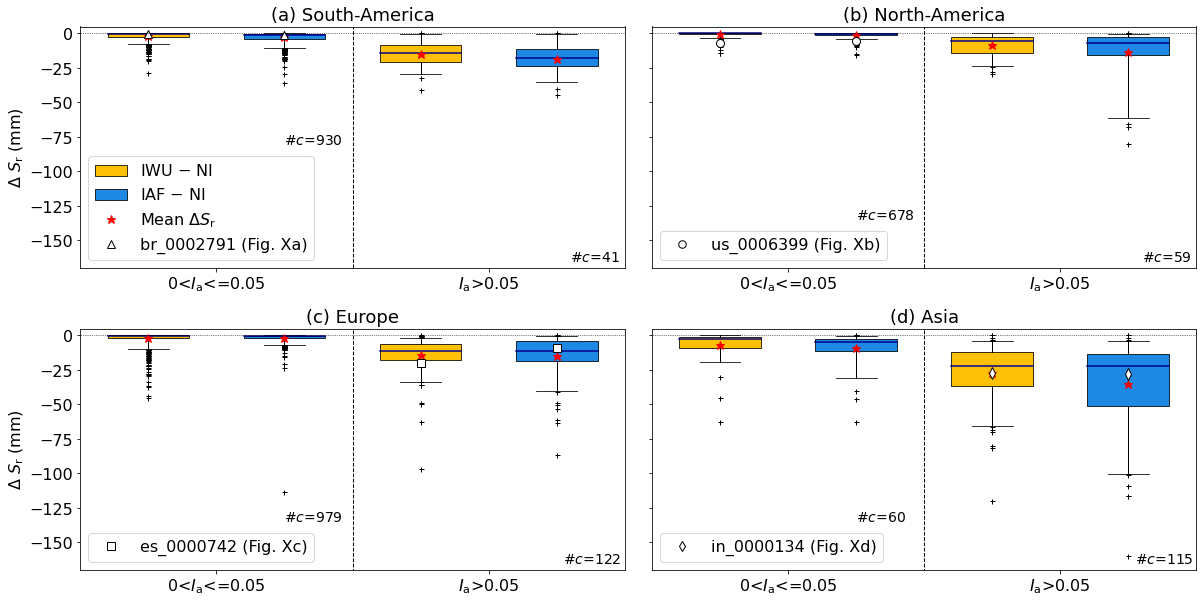

In [96]:
boxprops1 = dict(facecolor=c3,color="black",linewidth=0.8)
boxprops2 = dict(facecolor=c2,color="black",linewidth=0.8)
medianprops = dict(color="darkblue",linewidth=1.5)
meanpointprops = dict(marker='*', markeredgecolor='red',markerfacecolor='red',linestyle='None',markersize=9)
flierprops = dict(color='black',marker='+',markersize=5)
capprops = dict(linestyle='-', linewidth=0.8, color='Black')

ir2 = pd.read_csv(f'{work_dir}/data/irrigated_area/output/combined_ia.csv',index_col=0) 
ir = ir2.hi

# boxplot of Sr differences - ABS
fig = plt.figure(figsize=(20,10))

# south america
e_df = e_df_s
e_df0 = e_df[(ir>0)&(ir<=0.05)]
e_df1 = e_df[(ir>0.05)] 
ax = fig.add_subplot(221)
plt.subplots_adjust(wspace=0.05,hspace=0.25)
ax.boxplot(e_df0.iloc[:,0],positions=[1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.boxplot(e_df0.iloc[:,1],positions=[2],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
bp1=ax.boxplot(e_df1.iloc[:,0],positions=[3],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
bp2=ax.boxplot(e_df1.iloc[:,1],positions=[4],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.plot([1,2],e_df0.loc[ca1].values,marker='^',linestyle='None', markeredgecolor='black',markerfacecolor='white',markersize=8,zorder=1)

ax.set_ylim(-170,5)
ax.set_xlim(0.5,4.5)
ax.set_xticks([1.5,3.5])
ax.set_xticklabels(['0<$I_\mathrm{a}$<=0.05','$I_\mathrm{a}$>0.05'])
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=16)
ax.hlines(0,0,10,color='k',linestyle=':',linewidth=0.7)
ax.vlines(2.5,-200,20,color='k',linestyle='--',linewidth=1)
ax.annotate('#$c$='+str(e_df0.count()[0]),(2,-80),size=14)
ax.annotate('#$c$='+str(e_df1.count()[0]),(4.1,-165),size=14)
p2 = ax.plot(1,-200,marker='^',linestyle='None', markeredgecolor='black',markerfacecolor='white',markersize=8)
p1 = ax.plot(1,-200, marker='*', markeredgecolor='red',markerfacecolor='red',linestyle='None',markersize=9)
ax.legend([bp1["boxes"][0], bp2["boxes"][0],p1[0],p2[0]], ['IWU $-$ NI','IAF $-$ NI','Mean $\Delta$$S_\mathrm{r}$',f'{ca1} (Fig. Xa)'], loc='lower left',ncol=1,fontsize= 16)
ax.set_title('(a) South-America',size=18)

# north america
e_df = e_df_u
e_df0 = e_df[(ir>0)&(ir<=0.05)]
e_df1 = e_df[(ir>0.05)] 
ax = fig.add_subplot(222)
ax.boxplot(e_df0.iloc[:,0],positions=[1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.boxplot(e_df0.iloc[:,1],positions=[2],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
bp1=ax.boxplot(e_df1.iloc[:,0],positions=[3],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
bp2=ax.boxplot(e_df1.iloc[:,1],positions=[4],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.plot([1,2],e_df0.loc[ca2].values,marker='o',linestyle='None', markeredgecolor='black',markerfacecolor='white',markersize=8,zorder=1)
ax.set_ylim(-170,5)
ax.set_xlim(0.5,4.5)
ax.set_xticks([1.5,3.5])
ax.set_xticklabels(['0<$I_\mathrm{a}$<=0.05','$I_\mathrm{a}$>0.05'])
ax.tick_params(axis='both', which='major', labelsize=16)
ax.axes.get_yaxis().set_ticklabels([])
ax.hlines(0,0,10,color='k',linestyle=':',linewidth=0.7)
ax.vlines(2.5,-200,20,color='k',linestyle='--',linewidth=1)
ax.annotate('#$c$='+str(e_df0.count()[0]),(2,-135),size=14)
ax.annotate('#$c$='+str(e_df1.count()[0]),(4.1,-165),size=14)
p1 = ax.plot(1,-200, marker='o', markeredgecolor='black',markerfacecolor='white',linestyle = 'None',markersize=7.5)
p2 = ax.plot(1,-200,'r*',markersize=9)
ax.legend([p1[0]], [f'{ca2} (Fig. Xb)'], loc='lower left',ncol=1,fontsize= 16)
ax.set_title('(b) North-America',size=18)

# europe
e_df = e_df_e
e_df0 = e_df[(ir>0)&(ir<=0.05)]
e_df1 = e_df[(ir>0.05)] 
ax = fig.add_subplot(223)
ax.boxplot(e_df0.iloc[:,0],positions=[1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.boxplot(e_df0.iloc[:,1],positions=[2],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
bp1=ax.boxplot(e_df1.iloc[:,0],positions=[3],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
bp2=ax.boxplot(e_df1.iloc[:,1],positions=[4],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.plot([3,4],e_df1.loc[ca3].values,marker='s',linestyle='None', markeredgecolor='black',markerfacecolor='white',markersize=8,zorder=1)
ax.set_ylim(-170,5)
ax.set_xlim(0.5,4.5)
ax.set_xticks([1.5,3.5])
ax.set_xticklabels(['0<$I_\mathrm{a}$<=0.05','$I_\mathrm{a}$>0.05'])
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=16)
ax.hlines(0,0,10,color='k',linestyle=':',linewidth=0.7)
ax.vlines(2.5,-200,20,color='k',linestyle='--',linewidth=1)
ax.annotate('#$c$='+str(e_df0.count()[0]),(2,-135),size=14)
ax.annotate('#$c$='+str(e_df1.count()[0]),(4.05,-165),size=14)
p1 = ax.plot(1,-200, marker='s', markeredgecolor='black',markerfacecolor='white',linestyle = 'None',markersize=7.5)
p2 = ax.plot(1,-200,'r*',markersize=9)
ax.legend([p1[0]], [f'{ca3} (Fig. Xc)'], loc='lower left',ncol=1,fontsize= 16)
ax.set_title('(c) Europe',size=18)

# asia
e_df = e_df_a
e_df0 = e_df[(ir>0)&(ir<=0.05)]
e_df1 = e_df[(ir>0.05)] 
ax = fig.add_subplot(224)
ax.boxplot(e_df0.iloc[:,0],positions=[1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.boxplot(e_df0.iloc[:,1],positions=[2],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
bp1=ax.boxplot(e_df1.iloc[:,0],positions=[3],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
bp2=ax.boxplot(e_df1.iloc[:,1],positions=[4],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.plot([3,4],e_df1.loc[ca4].values,marker='d',linestyle='None', markeredgecolor='black',markerfacecolor='white',markersize=8,zorder=1)
ax.set_ylim(-170,5)
ax.set_xlim(0.5,4.5)
ax.set_xticks([1.5,3.5])
ax.set_xticklabels(['0<$I_\mathrm{a}$<=0.05','$I_\mathrm{a}$>0.05'])
ax.tick_params(axis='both', which='major', labelsize=16)
ax.axes.get_yaxis().set_ticklabels([])
ax.hlines(0,0,10,color='k',linestyle=':',linewidth=0.7)
ax.vlines(2.5,-200,20,color='k',linestyle='--',linewidth=1)
ax.annotate('#$c$='+str(e_df0.count()[0]),(2,-135),size=14)
ax.annotate('#$c$='+str(e_df1.count()[0]),(4.05,-165),size=14)
p1 = ax.plot(1,-200, marker='d', markeredgecolor='black',markerfacecolor='white',linestyle = 'None',markersize=7.5)
p2 = ax.plot(1,-200,'r*',markersize=9)
ax.legend([p1[0]], [f'{ca4} (Fig. Xd)'], loc='lower left',ncol=1,fontsize= 16)
ax.set_title('(d) Asia',size=18)

fig.savefig(f'{fig_dir}/box_abs_diff_ia_regions.jpg', dpi=300, bbox_inches='tight')


KeyError: 'us_0006399'

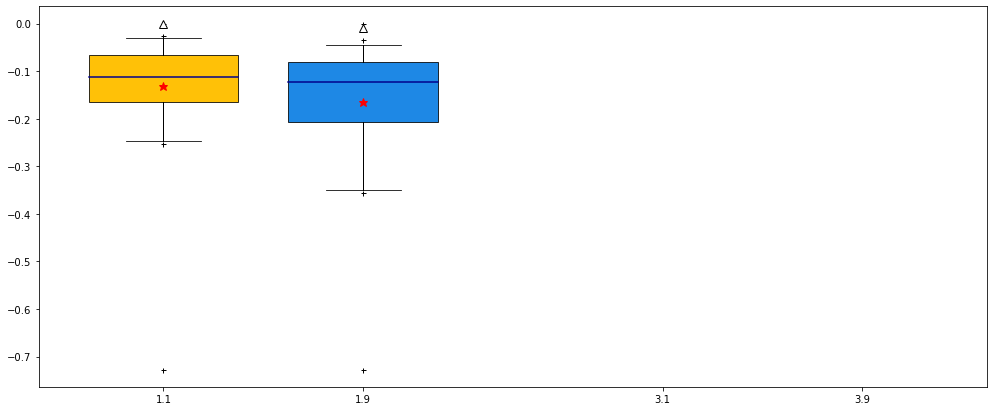

In [112]:
boxprops1 = dict(facecolor=c3,color="black",linewidth=0.8)
boxprops2 = dict(facecolor=c2,color="black",linewidth=0.8)
medianprops = dict(color="darkblue",linewidth=1.5)
meanpointprops = dict(marker='*', markeredgecolor='red',markerfacecolor='red',linestyle='None',markersize=9)
flierprops = dict(color='black',marker='+',markersize=5)
capprops = dict(linestyle='-', linewidth=0.8, color='Black')

ir2 = pd.read_csv(f'{work_dir}/data/irrigated_area/output/combined_ia.csv',index_col=0) 
ir = ir2.hi

# boxplot of Sr differences - ABS
fig = plt.figure(figsize=(17,7))

# south america
e_df = e_df_s
e_df0 = e_df[(ir>0)&(ir<=0.05)]
e_df1 = e_df[(ir>0.05)] 
ax = fig.add_subplot(111)
bp1=ax.boxplot(e_df1.iloc[:,0],positions=[1.1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
bp2=ax.boxplot(e_df1.iloc[:,1],positions=[1.9],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.plot([1.1,1.9],e_df0.loc[ca1].values,marker='^',linestyle='None', markeredgecolor='black',markerfacecolor='white',markersize=8,zorder=1)
ax.annotate('#$c$='+str(e_df1.count()[0]),(2.05,-98),size=14)

# north america
e_df = e_df_u
e_df0 = e_df[(ir>0)&(ir<=0.05)]
e_df1 = e_df[(ir>0.05)] 
bp1=ax.boxplot(e_df1.iloc[:,0],positions=[3.1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
bp2=ax.boxplot(e_df1.iloc[:,1],positions=[3.9],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.plot([3.1,3.9],e_df0.loc[ca2].values,marker='o',linestyle='None', markeredgecolor='black',markerfacecolor='white',markersize=8,zorder=1)
ax.annotate('#$c$='+str(e_df1.count()[0]),(4.05,-98),size=14)
p1 = ax.plot(1,-200, marker='o', markeredgecolor='black',markerfacecolor='white',linestyle = 'None',markersize=7.5)
p2 = ax.plot(1,-200,'r*',markersize=9)
ax.legend([p1[0]], [f'{ca2} (Fig. Xb)'], loc='lower left',ncol=1,fontsize= 16)

# europe
e_df = e_df_e
e_df0 = e_df[(ir>0)&(ir<=0.05)]
e_df1 = e_df[(ir>0.05)] 
bp1=ax.boxplot(e_df1.iloc[:,0],positions=[5.1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
bp2=ax.boxplot(e_df1.iloc[:,1],positions=[5.9],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.plot([5.1,5.9],e_df1.loc[ca3].values,marker='s',linestyle='None', markeredgecolor='black',markerfacecolor='white',markersize=8,zorder=1)
ax.annotate('#$c$='+str(e_df1.count()[0]),(5.95,-98),size=14)
p1 = ax.plot(1,-200, marker='s', markeredgecolor='black',markerfacecolor='white',linestyle = 'None',markersize=7.5)
p2 = ax.plot(1,-200,'r*',markersize=9)
ax.legend([p1[0]], [f'{ca3} (Fig. Xc)'], loc='lower left',ncol=1,fontsize= 16)

# asia
e_df = e_df_a
e_df0 = e_df[(ir>0)&(ir<=0.05)]
e_df1 = e_df[(ir>0.05)] 
e_df1.loc['in_0000026']['f0_fiwu']=-100.1
e_df1.loc['id_0000009']['f0_fopt']=-100.001
# e_df1.loc['in_0000117']['f0_fopt']=-100.1
# e_df1.loc['in_0000269']['f0_fopt']=-100.1
# e_df1.loc['in_0000053']['f0_fopt']=-100.1
# e_df1.loc['in_0000039']['f0_fopt']=-100.1
# e_df1.loc['in_0000052']['f0_fopt']=-100.1
# e_df1.loc['in_0000281']['f0_fopt']=-100.1
# e_df1.loc['id_0000019']['f0_fopt']=-100.1
bp1=ax.boxplot(e_df1.iloc[:,0],positions=[7.1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
bp2=ax.boxplot(e_df1.iloc[:,1],positions=[7.9],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.plot([7.1,7.9],e_df1.loc[ca4].values,marker='d',linestyle='None', markeredgecolor='black',markerfacecolor='white',markersize=8,zorder=1)
ax.annotate('#$c$='+str(e_df1.count()[0]),(7.95,-98),size=14)
ax.set_ylim(-103,5)
ax.set_xlim(0.5,8.5)
ax.set_xticks([1.5,3.5,5.5,7.5])
ax.set_yticks([0,-20,-40,-60,-80,-100])
ax.set_yticklabels([0,-20,-40,-60,-80,'< -100'])
ax.set_xticklabels(['South-America','North-America','Europe','Asia'],size=18)
ax.xaxis.set_tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=16)

ax.hlines(0,0,10,color='k',linestyle=':',linewidth=0.7)
ax.hlines(-100,0,10,color='k',linestyle=':',linewidth=0.7)
ax.vlines(2.5,-200,20,color='k',linestyle='--',linewidth=1)
ax.vlines(4.5,-200,20,color='k',linestyle='--',linewidth=1)
ax.vlines(6.5,-200,20,color='k',linestyle='--',linewidth=1)

p2 = ax.plot(1,-200, marker='d', markeredgecolor='black',markerfacecolor='white',linestyle = 'None',markersize=7.5)
p1 = ax.plot(1,-200,'r*',markersize=9)
ax.legend([bp1["boxes"][0], bp2["boxes"][0],p1[0],p2[0],p3[0],p4[0],p5[0]],
          ['IWU $-$ NI','IAF $-$ NI','Mean $\Delta$$S_\mathrm{r}$',
           '\n'.join(wrap(f'{ca1} (Fig. Xa)', 10)),'\n'.join(wrap(f'{ca2} (Fig. Xb)', 10)),'\n'.join(wrap(f'{ca3} (Fig. Xc)', 10)),'\n'.join(wrap(f'{ca4} (Fig. Xd)', 10))],
          ncol=1,fontsize= 16,loc='lower center',bbox_to_anchor=(1.09, 0.10),handletextpad=0.6,labelspacing=1,columnspacing = 0.5)

fig.savefig(f'{fig_dir}/box_abs_diff_ia_regions.jpg', dpi=300, bbox_inches='tight')

In [245]:
#south america
e_df = e_df_s
e_df0 = e_df[(ir>0)&(ir<=0.05)]
e_df1 = e_df[(ir>0.05)] 

d = pd.DataFrame(index=['$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI','$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI'])
d['med0']=np.round(e_df0.median(),2).values
d['std0']=np.round(e_df0.std(),2).values

d['med1']=np.round(e_df1.median(),2).values
d['std1']=np.round(e_df1.std(),2).values

d

,med0,std0,med1,std1
$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI,-0.59,3.03,-14.12,9.58
$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI,-1.31,3.81,-17.80,10.57


In [246]:
#north america
e_df = e_df_u
e_df0 = e_df[(ir>0)&(ir<=0.05)]
e_df1 = e_df[(ir>0.05)] 

d = pd.DataFrame(index=['$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI','$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI'])
d['med0']=np.round(e_df0.median(),2).values
d['std0']=np.round(e_df0.std(),2).values

d['med1']=np.round(e_df1.median(),4).values
d['std1']=np.round(e_df1.std(),2).values

d

,med0,std0,med1,std1
$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI,-0.05,1.62,-5.683,7.77
$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI,-0.33,1.69,-6.635,17.42


In [247]:
#europe
e_df = e_df_e
e_df0 = e_df[(ir>0)&(ir<=0.05)]
e_df1 = e_df[(ir>0.05)] 

d = pd.DataFrame(index=['$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI','$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI'])
d['med0']=np.round(e_df0.median(),2).values
d['std0']=np.round(e_df0.std(),2).values

d['med1']=np.round(e_df1.median(),2).values
d['std1']=np.round(e_df1.std(),2).values

d

,med0,std0,med1,std1
$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI,-0.26,4.83,-11.66,13.06
$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI,-0.71,4.31,-11.34,14.58


In [248]:
#asia
e_df = e_df_a
e_df0 = e_df[(ir>0)&(ir<=0.05)]
e_df1 = e_df[(ir>0.05)] 

d = pd.DataFrame(index=['$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI','$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI'])
d['med0']=np.round(e_df0.median(),2).values
d['std0']=np.round(e_df0.std(),2).values

d['med1']=np.round(e_df1.median(),2).values
d['std1']=np.round(e_df1.std(),2).values

d

,med0,std0,med1,std1
$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI,-2.61,10.64,-22.17,20.68
$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI,-4.96,11.32,-21.84,31.67


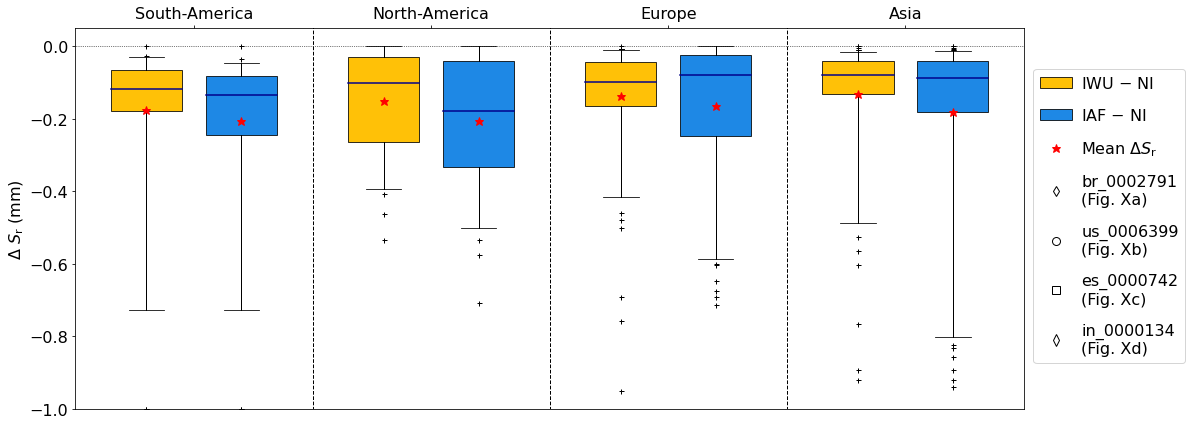

In [114]:
boxprops1 = dict(facecolor=c3,color="black",linewidth=0.8)
boxprops2 = dict(facecolor=c2,color="black",linewidth=0.8)
medianprops = dict(color="darkblue",linewidth=1.5)
meanpointprops = dict(marker='*', markeredgecolor='red',markerfacecolor='red',linestyle='None',markersize=9)
flierprops = dict(color='black',marker='+',markersize=5)
capprops = dict(linestyle='-', linewidth=0.8, color='Black')

ir2 = pd.read_csv(f'{work_dir}/data/irrigated_area/output/combined_ia.csv',index_col=0) 
ir = ir2.hi

# boxplot of Sr differences - ABS
fig = plt.figure(figsize=(17,7))

# south america
e_df = er_df_s
e_df0 = e_df[(ir>0)&(ir<=0.05)]
e_df1 = e_df[(ir>0.05)] 
ax = fig.add_subplot(111)
bp1=ax.boxplot(e_df1.iloc[:,0],positions=[1.1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
bp2=ax.boxplot(e_df1.iloc[:,1],positions=[1.9],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
# ax.plot([1.1,1.9],e_df0.loc[ca1].values,marker='^',linestyle='None', markeredgecolor='black',markerfacecolor='white',markersize=8,zorder=1)
ax.annotate('#$c$='+str(e_df1.count()[0]),(2.05,-98),size=14)

# north america
e_df = er_df_u
e_df0 = e_df[(ir>0)&(ir<=0.05)]
e_df1 = e_df[(ir>0.05)] 
bp1=ax.boxplot(e_df1.iloc[:,0],positions=[3.1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
bp2=ax.boxplot(e_df1.iloc[:,1],positions=[3.9],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
# ax.plot([3.1,3.9],e_df0.loc[ca2].values,marker='o',linestyle='None', markeredgecolor='black',markerfacecolor='white',markersize=8,zorder=1)
ax.annotate('#$c$='+str(e_df1.count()[0]),(4.05,-98),size=14)
p1 = ax.plot(1,-200, marker='o', markeredgecolor='black',markerfacecolor='white',linestyle = 'None',markersize=7.5)
p2 = ax.plot(1,-200,'r*',markersize=9)
ax.legend([p1[0]], [f'{ca2} (Fig. Xb)'], loc='lower left',ncol=1,fontsize= 16)

# europe
e_df = er_df_e
e_df0 = e_df[(ir>0)&(ir<=0.05)]
e_df1 = e_df[(ir>0.05)] 
bp1=ax.boxplot(e_df1.iloc[:,0],positions=[5.1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
bp2=ax.boxplot(e_df1.iloc[:,1],positions=[5.9],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
# ax.plot([5.1,5.9],e_df1.loc[ca3].values,marker='s',linestyle='None', markeredgecolor='black',markerfacecolor='white',markersize=8,zorder=1)
ax.annotate('#$c$='+str(e_df1.count()[0]),(5.95,-98),size=14)
p1 = ax.plot(1,-200, marker='s', markeredgecolor='black',markerfacecolor='white',linestyle = 'None',markersize=7.5)
p2 = ax.plot(1,-200,'r*',markersize=9)
ax.legend([p1[0]], [f'{ca3} (Fig. Xc)'], loc='lower left',ncol=1,fontsize= 16)

# asia
e_df = er_df_a
e_df0 = e_df[(ir>0)&(ir<=0.05)]
e_df1 = e_df[(ir>0.05)] 
# e_df1.loc['in_0000026']['f0_fiwu']=-100.1
# e_df1.loc['id_0000009']['f0_fopt']=-100.001
# e_df1.loc['in_0000117']['f0_fopt']=-100.1
# e_df1.loc['in_0000269']['f0_fopt']=-100.1
# e_df1.loc['in_0000053']['f0_fopt']=-100.1
# e_df1.loc['in_0000039']['f0_fopt']=-100.1
# e_df1.loc['in_0000052']['f0_fopt']=-100.1
# e_df1.loc['in_0000281']['f0_fopt']=-100.1
# e_df1.loc['id_0000019']['f0_fopt']=-100.1
bp1=ax.boxplot(e_df1.iloc[:,0],positions=[7.1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
bp2=ax.boxplot(e_df1.iloc[:,1],positions=[7.9],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
# ax.plot([7.1,7.9],e_df1.loc[ca4].values,marker='d',linestyle='None', markeredgecolor='black',markerfacecolor='white',markersize=8,zorder=1)
ax.annotate('#$c$='+str(e_df1.count()[0]),(7.95,-98),size=14)
ax.set_ylim(-1,0.05)
ax.set_xlim(0.5,8.5)
ax.set_xticks([1.5,3.5,5.5,7.5])
# ax.set_yticks([0,-20,-40,-60,-80,-100])
# ax.set_yticklabels([0,-20,-40,-60,-80,'< -100'])
ax.set_xticklabels(['South-America','North-America','Europe','Asia'],size=18)
ax.xaxis.set_tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=16)

ax.hlines(0,0,10,color='k',linestyle=':',linewidth=0.7)
ax.hlines(-100,0,10,color='k',linestyle=':',linewidth=0.7)
ax.vlines(2.5,-200,20,color='k',linestyle='--',linewidth=1)
ax.vlines(4.5,-200,20,color='k',linestyle='--',linewidth=1)
ax.vlines(6.5,-200,20,color='k',linestyle='--',linewidth=1)

p2 = ax.plot(1,-200, marker='d', markeredgecolor='black',markerfacecolor='white',linestyle = 'None',markersize=7.5)
p1 = ax.plot(1,-200,'r*',markersize=9)
ax.legend([bp1["boxes"][0], bp2["boxes"][0],p1[0],p2[0],p3[0],p4[0],p5[0]],
          ['IWU $-$ NI','IAF $-$ NI','Mean $\Delta$$S_\mathrm{r}$',
           '\n'.join(wrap(f'{ca1} (Fig. Xa)', 10)),'\n'.join(wrap(f'{ca2} (Fig. Xb)', 10)),'\n'.join(wrap(f'{ca3} (Fig. Xc)', 10)),'\n'.join(wrap(f'{ca4} (Fig. Xd)', 10))],
          ncol=1,fontsize= 16,loc='lower center',bbox_to_anchor=(1.09, 0.10),handletextpad=0.6,labelspacing=1,columnspacing = 0.5)

fig.savefig(f'{fig_dir}/box_rel_diff_ia_regions.jpg', dpi=300, bbox_inches='tight')

In [110]:
e_df0

,f0_fiwu,f0_fopt,fopt_fiwu,lat,lon
br_0000837,-0.0063,-0.0127,0.0064,-20.665734,-43.963670
br_0001950,0.0000,-0.0274,0.0282,-22.448229,-45.450529
br_0002844,-0.0667,-0.1333,0.0769,-28.090812,-49.858132
br_0002050,-0.0794,-0.0794,0.0000,-22.310617,-46.361575
br_0000390,0.0000,0.0000,0.0000,-9.319533,-47.240984
...,...,...,...,...,...
br_0002511,0.0000,0.0000,0.0000,-24.455305,-52.645417
br_0002479,0.0000,-0.0167,0.0169,-23.669037,-52.722549
br_0001153,-0.0120,-0.0241,0.0123,-12.481602,-38.549986
br_0001575,-0.0060,-0.0060,0.0000,-22.732315,-44.985285


## STRATIFY ARIDITY IA>0.05

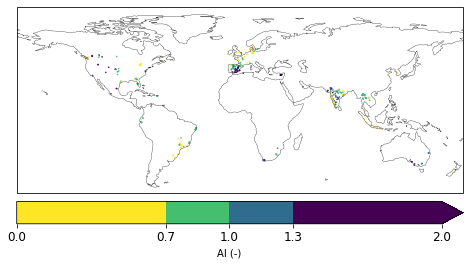

In [45]:
# combine Sr output in dataframe
sr_df_ni = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sr_no_irri_combined_points.csv', index_col=0)
sr_df_f09ia = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sr_irri_f0.9ia_combined_points.csv', index_col=0)
sr_df_fiwu2 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sr_irri_fiwu2_combined_points.csv', index_col=0)

sr_df = pd.DataFrame(index=sr_df_ni.index)
sr_df['sr_2_f0'] = sr_df_ni['k3']
sr_df['sr_2_fiwu'] = sr_df_fiwu2['k3']
sr_df['sr_2_fopt'] = sr_df_f09ia['k3']

sr_df = sr_df.astype(int) #int values
sr_df = sr_df.dropna()

# dataframes with errors
f0_iwu_e = np.round(sr_df.sr_2_fiwu-sr_df.sr_2_f0,3)
f0_opt_e = np.round(sr_df.sr_2_fopt-sr_df.sr_2_f0,3)

f0_iwu_er = np.round((sr_df.sr_2_fiwu-sr_df.sr_2_f0)/sr_df.sr_2_f0 ,4)
f0_opt_er = np.round((sr_df.sr_2_fopt-sr_df.sr_2_f0)/sr_df.sr_2_f0 ,4)

e_df = pd.DataFrame(index=sr_df.index, columns=['f0_fiwu','f0_fopt'])
e_df['f0_fiwu'] = f0_iwu_e
e_df['f0_fopt'] = f0_opt_e

er_df = pd.DataFrame(index=sr_df.index, columns=['f0_fiwu','f0_fopt'])
er_df['f0_fiwu'] = f0_iwu_er
er_df['f0_fopt'] = f0_opt_er

# drop pos catchments
# ix_drop = ['us_0006081','br_0000699','za_0000167','us_0005876','us_0004753','ca_0000774'] #catchments with sr increasing with irri compared to no-irri
# sr_df = sr_df.drop(index=ix_drop)
# e_df = e_df.drop(index=ix_drop)
# er_df = er_df.drop(index=ix_drop)

ir2 = pd.read_csv(f'{work_dir}/data/irrigated_area/output/combined_ia.csv',index_col=0) 
ir = ir2.hi

e_df = e_df[ir>0.05]
er_df = er_df[ir>0.05]

bounds = [0,0.7,1,1.3,2]
bounds2 =[0,0.7,1,1.3,2]
norm = mpl.colors.BoundaryNorm(bounds, cmap_vd2.N)

cc = pd.read_csv(f'{work_dir}/output/catchment_characteristics/catchment_characteristics_gswp-p_gleam-ep_gswp-t.csv',index_col=0)
cc.ai = 1/cc.ai
ai = cc.ai
cc = cc.loc[e_df.index]

# no irrigation
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(cc.lon,cc.lat,c=(cc['ai']),s=0.3,cmap=cmap_vd2, norm=norm)
cbar = plt.colorbar(s, orientation='horizontal', label='AI (-)',spacing='proportional',extend='max', pad=0.02, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=12)
# ax.set_title('AI (-)',size=14)
fig.savefig(f'{fig_dir}/ai_map.jpg',bbox_inches='tight',dpi=300)

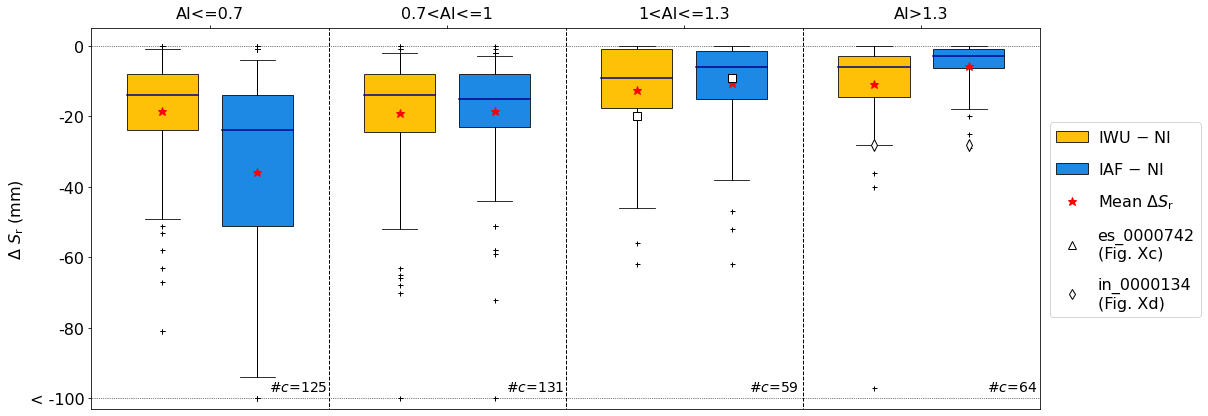

In [50]:
#abs - IA bins
e_df0 = e_df[(ai<0.7)]
e_df1 = e_df[(ai>0.7)&(ai<=1)]
e_df2 = e_df[(ai>1)&(ai<=1.3)]
e_df3 = e_df[(ai>1.3)]

e_df1.loc['in_0000026']['f0_fiwu']=-100
e_df0.loc['id_0000009']['f0_fopt']=-100.001
e_df0.loc['in_0000281']['f0_fopt']=-100.001

boxprops1 = dict(facecolor=c3,color="black",linewidth=0.8)
boxprops2 = dict(facecolor=c2,color="black",linewidth=0.8)
medianprops = dict(color="darkblue",linewidth=1.5)
meanpointprops = dict(marker='*', markeredgecolor='red',markerfacecolor='red',linestyle='None',markersize=9)
flierprops = dict(color='black',marker='+',markersize=5)
capprops = dict(linestyle='-', linewidth=0.8, color='Black')

# boxplot of Sr differences - ABS
fig = plt.figure(figsize=(17,7))
ax = fig.add_subplot(111)
plt.subplots_adjust(wspace=0.05)
ax.boxplot(e_df0.iloc[:,0],positions=[1.1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.boxplot(e_df0.iloc[:,1],positions=[1.9],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)

ax.boxplot(e_df1.iloc[:,0],positions=[3.1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.boxplot(e_df1.iloc[:,1],positions=[3.9],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)

ax.boxplot(e_df2.iloc[:,0],positions=[5.1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.boxplot(e_df2.iloc[:,1],positions=[5.9],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.plot([5.1,5.9],e_df2.loc[ca3].values,marker='s',linestyle='None', markeredgecolor='black',markerfacecolor='white',markersize=8,zorder=1)

bp1=ax.boxplot(e_df3.iloc[:,0],positions=[7.1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
bp2=ax.boxplot(e_df3.iloc[:,1],positions=[7.9],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.plot([7.1,7.9],e_df3.loc[ca4].values,marker='d',linestyle='None', markeredgecolor='black',markerfacecolor='white',markersize=8,zorder=1)

ax.annotate('#$c$='+str(e_df0.count()[0]),(2,-98),size=14)
ax.annotate('#$c$='+str(e_df1.count()[0]),(4,-98),size=14)
ax.annotate('#$c$='+str(e_df2.count()[0]),(6.05,-98),size=14)
ax.annotate('#$c$='+str(e_df3.count()[0]),(8.05,-98),size=14)


p3 = ax.plot(1,-200, marker='^', markeredgecolor='black',markerfacecolor='white',linestyle = 'None',markersize=7.5)
# p2 = ax.plot(1,-200,'r*',markersize=9)

ax.set_ylim(-103,5)
ax.set_xlim(0.5,8.5)
ax.set_xticks([1.5,3.5,5.5,7.5])
ax.set_yticks([0,-20,-40,-60,-80,-100])
ax.set_yticklabels([0,-20,-40,-60,-80,'< -100'])
ax.set_xticklabels(['AI<=0.7','0.7<AI<=1','1<AI<=1.3','AI>1.3'],size=18)
ax.xaxis.set_tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=16)

ax.hlines(0,0,10,color='k',linestyle=':',linewidth=0.7)
ax.hlines(-100,0,10,color='k',linestyle=':',linewidth=0.7)
ax.vlines(2.5,-200,20,color='k',linestyle='--',linewidth=1)
ax.vlines(4.5,-200,20,color='k',linestyle='--',linewidth=1)
ax.vlines(6.5,-200,20,color='k',linestyle='--',linewidth=1)

p2 = ax.plot(1,-200, marker='d', markeredgecolor='black',markerfacecolor='white',linestyle = 'None',markersize=7.5)
p1 = ax.plot(1,-200,'r*',markersize=9)
ax.legend([bp1["boxes"][0], bp2["boxes"][0],p1[0],p3[0],p2[0]],
          ['IWU $-$ NI','IAF $-$ NI','Mean $\Delta$$S_\mathrm{r}$',
           '\n'.join(wrap(f'{ca3} (Fig. Xc)', 10)),'\n'.join(wrap(f'{ca4} (Fig. Xd)', 10))],
          ncol=1,fontsize= 16,loc='lower center',bbox_to_anchor=(1.09, 0.22),handletextpad=0.6,labelspacing=1,columnspacing = 0.5)

fig.savefig(f'{fig_dir}/box_abs_diff_AI.jpg', dpi=300, bbox_inches='tight')

In [51]:
d = pd.DataFrame(index=['$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI','$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI'])
d['med0']=np.round(e_df0.median(),2).values
d['std0']=np.round(e_df0.std(),2).values

d['med1']=np.round(e_df1.median(),2).values
d['std1']=np.round(e_df1.std(),2).values

d['med2']=np.round(e_df2.median(),2).values
d['std2']=np.round(e_df2.std(),2).values

d['med3']=np.round(e_df3.median(),2).values
d['std3']=np.round(e_df3.std(),2).values

d

,med0,std0,med1,std1,med2,std2,med3,std3
$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI,-14.0,16.32,-14.0,16.42,-9.0,14.54,-6.0,14.37
$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI,-24.0,30.69,-15.0,15.01,-6.0,13.07,-3.0,6.86


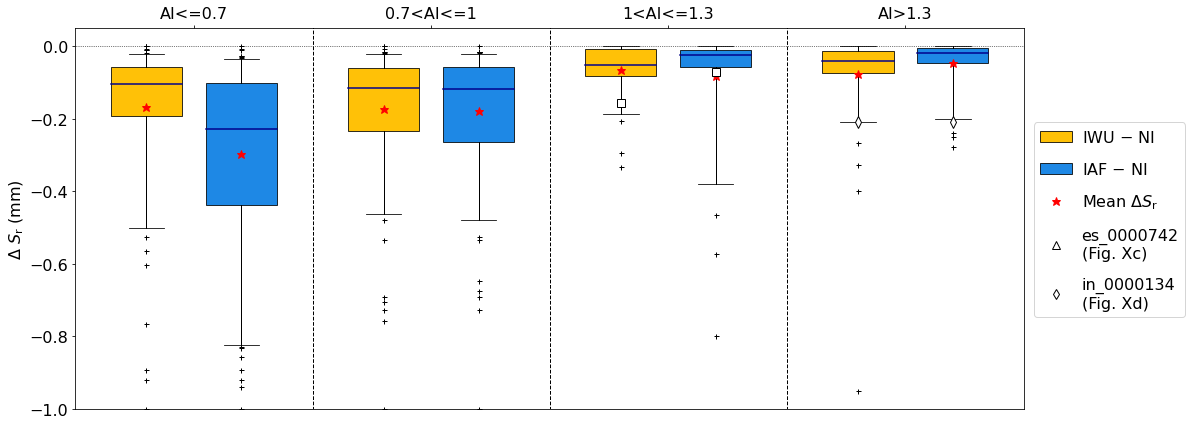

In [53]:
#abs - IA bins
e_df0 = er_df[(ai<0.7)]
e_df1 = er_df[(ai>0.7)&(ai<=1)]
e_df2 = er_df[(ai>1)&(ai<=1.3)]
e_df3 = er_df[(ai>1.3)]

e_df0 = e_df0.dropna()

# e_df1.loc['in_0000026']['f0_fiwu']=-100
# e_df0.loc['id_0000009']['f0_fopt']=-100.001
# e_df0.loc['in_0000281']['f0_fopt']=-100.001

boxprops1 = dict(facecolor=c3,color="black",linewidth=0.8)
boxprops2 = dict(facecolor=c2,color="black",linewidth=0.8)
medianprops = dict(color="darkblue",linewidth=1.5)
meanpointprops = dict(marker='*', markeredgecolor='red',markerfacecolor='red',linestyle='None',markersize=9)
flierprops = dict(color='black',marker='+',markersize=5)
capprops = dict(linestyle='-', linewidth=0.8, color='Black')

# boxplot of Sr differences - ABS
fig = plt.figure(figsize=(17,7))
ax = fig.add_subplot(111)
plt.subplots_adjust(wspace=0.05)
ax.boxplot(e_df0.iloc[:,0],positions=[1.1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.boxplot(e_df0.iloc[:,1],positions=[1.9],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)

ax.boxplot(e_df1.iloc[:,0],positions=[3.1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.boxplot(e_df1.iloc[:,1],positions=[3.9],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)

ax.boxplot(e_df2.iloc[:,0],positions=[5.1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.boxplot(e_df2.iloc[:,1],positions=[5.9],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.plot([5.1,5.9],e_df2.loc[ca3].values,marker='s',linestyle='None', markeredgecolor='black',markerfacecolor='white',markersize=8,zorder=1)

bp1=ax.boxplot(e_df3.iloc[:,0],positions=[7.1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
bp2=ax.boxplot(e_df3.iloc[:,1],positions=[7.9],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.plot([7.1,7.9],e_df3.loc[ca4].values,marker='d',linestyle='None', markeredgecolor='black',markerfacecolor='white',markersize=8,zorder=1)

ax.annotate('#$c$='+str(e_df0.count()[0]),(2,-98),size=14)
ax.annotate('#$c$='+str(e_df1.count()[0]),(4,-98),size=14)
ax.annotate('#$c$='+str(e_df2.count()[0]),(6.05,-98),size=14)
ax.annotate('#$c$='+str(e_df3.count()[0]),(8.05,-98),size=14)


p3 = ax.plot(1,-200, marker='^', markeredgecolor='black',markerfacecolor='white',linestyle = 'None',markersize=7.5)
# p2 = ax.plot(1,-200,'r*',markersize=9)

ax.set_ylim(-1,0.05)
ax.set_xlim(0.5,8.5)
ax.set_xticks([1.5,3.5,5.5,7.5])
# ax.set_yticks([0,-20,-40,-60,-80,-100])
# ax.set_yticklabels([0,-20,-40,-60,-80,'< -100'])
ax.set_xticklabels(['AI<=0.7','0.7<AI<=1','1<AI<=1.3','AI>1.3'],size=18)
ax.xaxis.set_tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=16)

ax.hlines(0,0,10,color='k',linestyle=':',linewidth=0.7)
ax.hlines(-100,0,10,color='k',linestyle=':',linewidth=0.7)
ax.vlines(2.5,-200,20,color='k',linestyle='--',linewidth=1)
ax.vlines(4.5,-200,20,color='k',linestyle='--',linewidth=1)
ax.vlines(6.5,-200,20,color='k',linestyle='--',linewidth=1)

p2 = ax.plot(1,-200, marker='d', markeredgecolor='black',markerfacecolor='white',linestyle = 'None',markersize=7.5)
p1 = ax.plot(1,-200,'r*',markersize=9)
ax.legend([bp1["boxes"][0], bp2["boxes"][0],p1[0],p3[0],p2[0]],
          ['IWU $-$ NI','IAF $-$ NI','Mean $\Delta$$S_\mathrm{r}$',
           '\n'.join(wrap(f'{ca3} (Fig. Xc)', 10)),'\n'.join(wrap(f'{ca4} (Fig. Xd)', 10))],
          ncol=1,fontsize= 16,loc='lower center',bbox_to_anchor=(1.09, 0.22),handletextpad=0.6,labelspacing=1,columnspacing = 0.5)

fig.savefig(f'{fig_dir}/box_rel_diff_AI.jpg', dpi=300, bbox_inches='tight')

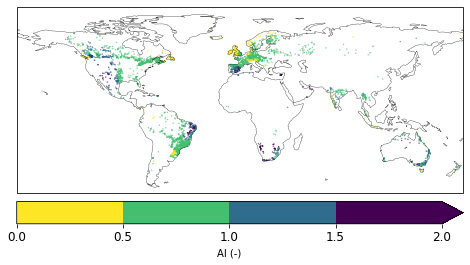

In [54]:
# combine Sr output in dataframe
sr_df_ni = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sr_no_irri_combined_points.csv', index_col=0)
sr_df_f09ia = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sr_irri_f0.9ia_combined_points.csv', index_col=0)
sr_df_fiwu2 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sr_irri_fiwu2_combined_points.csv', index_col=0)

sr_df = pd.DataFrame(index=sr_df_ni.index)
sr_df['sr_2_f0'] = sr_df_ni['k3']
sr_df['sr_2_fiwu'] = sr_df_fiwu2['k3']
sr_df['sr_2_fopt'] = sr_df_f09ia['k3']

sr_df = sr_df.astype(int) #int values
sr_df = sr_df.dropna()

# dataframes with errors
f0_iwu_e = np.round(sr_df.sr_2_fiwu-sr_df.sr_2_f0,3)
f0_opt_e = np.round(sr_df.sr_2_fopt-sr_df.sr_2_f0,3)

f0_iwu_er = np.round((sr_df.sr_2_fiwu-sr_df.sr_2_f0)/sr_df.sr_2_f0 ,4)
f0_opt_er = np.round((sr_df.sr_2_fopt-sr_df.sr_2_f0)/sr_df.sr_2_f0 ,4)

e_df = pd.DataFrame(index=sr_df.index, columns=['f0_fiwu','f0_fopt'])
e_df['f0_fiwu'] = f0_iwu_e
e_df['f0_fopt'] = f0_opt_e

er_df = pd.DataFrame(index=sr_df.index, columns=['f0_fiwu','f0_fopt'])
er_df['f0_fiwu'] = f0_iwu_er
er_df['f0_fopt'] = f0_opt_er

# drop pos catchments
ix_drop = ['us_0006081','br_0000699','za_0000167','us_0005876','us_0004753','ca_0000774'] #catchments with sr increasing with irri compared to no-irri
sr_df = sr_df.drop(index=ix_drop)
e_df = e_df.drop(index=ix_drop)
er_df = er_df.drop(index=ix_drop)

ir2 = pd.read_csv(f'{work_dir}/data/irrigated_area/output/combined_ia.csv',index_col=0) 
ir = ir2.hi

# e_df = e_df[ir>0.01]
# er_df = er_df[ir>0.01]

bounds = [0,0.5,1,1.5,2]
bounds2 =[0,0.5,1,1.5,2]
norm = mpl.colors.BoundaryNorm(bounds, cmap_vd2.N)

cc = pd.read_csv(f'{work_dir}/output/catchment_characteristics/catchment_characteristics_gswp-p_gleam-ep_gswp-t.csv',index_col=0)
cc.ai = 1/cc.ai
ai = cc.ai
cc = cc.loc[e_df.index]

# no irrigation
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(cc.lon,cc.lat,c=(cc['ai']),s=0.1,cmap=cmap_vd2, norm=norm)
cbar = plt.colorbar(s, orientation='horizontal', label='AI (-)',spacing='proportional',extend='max', pad=0.02, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=12)
# ax.set_title('AI (-)',size=14)
fig.savefig(f'{fig_dir}/ai_map2.jpg',bbox_inches='tight',dpi=300)

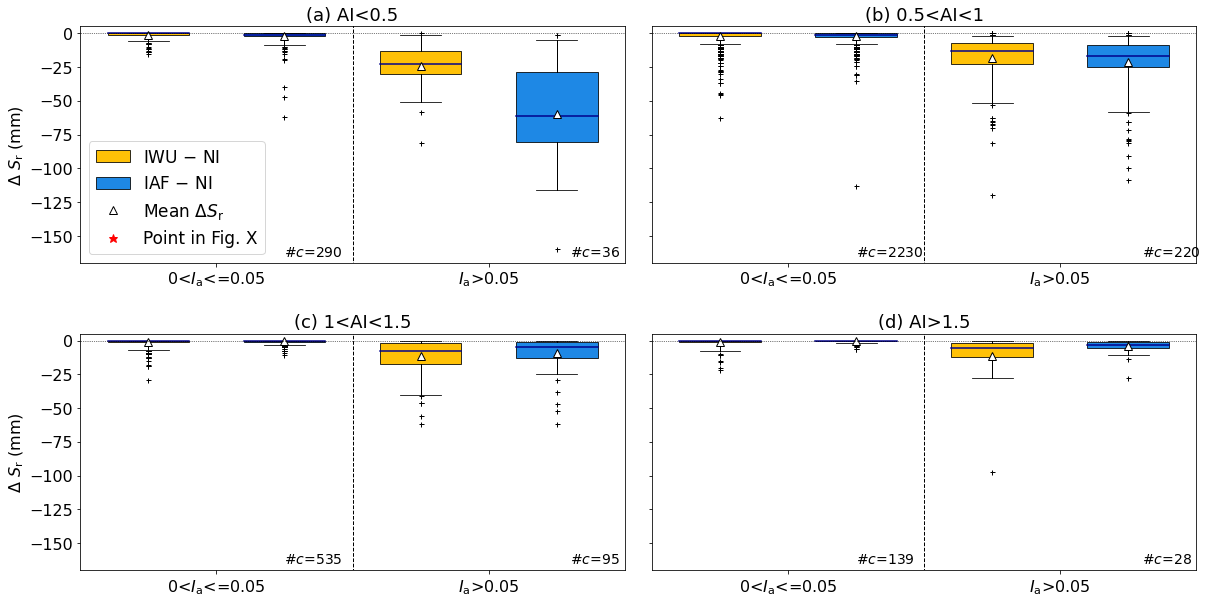

In [55]:
boxprops1 = dict(facecolor=c3,color="black",linewidth=0.8)
boxprops2 = dict(facecolor=c2,color="black",linewidth=0.8)
medianprops = dict(color="darkblue",linewidth=1.5)
meanpointprops = dict(marker='^', markeredgecolor='black',markerfacecolor='white',markersize=7.5)
flierprops = dict(color='black',marker='+',markersize=5)
capprops = dict(linestyle='-', linewidth=0.8, color='Black')

ir2 = pd.read_csv(f'{work_dir}/data/irrigated_area/output/combined_ia.csv',index_col=0) 
ir = ir2.hi

# boxplot of Sr differences - ABS
fig = plt.figure(figsize=(20,10))

# ai<0.5
e_dfp = e_df[ai<0.5]
e_df0 = e_dfp[(ir>0)&(ir<=0.05)]
e_df1 = e_dfp[(ir>0.05)] 
ax = fig.add_subplot(221)
plt.subplots_adjust(wspace=0.05,hspace=0.3)
ax.boxplot(e_df0.iloc[:,0],positions=[1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.boxplot(e_df0.iloc[:,1],positions=[2],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
bp1=ax.boxplot(e_df1.iloc[:,0],positions=[3],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
bp2=ax.boxplot(e_df1.iloc[:,1],positions=[4],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.set_ylim(-170,5)
ax.set_xlim(0.5,4.5)
ax.set_xticks([1.5,3.5])
ax.set_xticklabels(['0<$I_\mathrm{a}$<=0.05','$I_\mathrm{a}$>0.05'])
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=16)
ax.hlines(0,0,10,color='k',linestyle=':',linewidth=0.7)
ax.vlines(2.5,-200,20,color='k',linestyle='--',linewidth=1)
ax.annotate('#$c$='+str(e_df0.count()[0]),(2,-165),size=14)
ax.annotate('#$c$='+str(e_df1.count()[0]),(4.1,-165),size=14)
p1 = ax.plot(1,-200, marker='^', markeredgecolor='black',markerfacecolor='white',linestyle = 'None',markersize=7.5)
p2 = ax.plot(1,-200,'r*',markersize=9)
ax.legend([bp1["boxes"][0], bp2["boxes"][0],p1[0],p2[0]], ['IWU $-$ NI','IAF $-$ NI','Mean $\Delta$$S_\mathrm{r}$','Point in Fig. X'], loc='lower left',ncol=1,fontsize= 17)
ax.set_title('(a) AI<0.5',size=18)

# ai<1
e_dfp = e_df[(ai>0.5)&(ai<=1)]
e_df0 = e_dfp[(ir>0)&(ir<=0.05)]
e_df1 = e_dfp[(ir>0.05)] 
ax = fig.add_subplot(222)
plt.subplots_adjust(wspace=0.05,hspace=0.3)
ax.boxplot(e_df0.iloc[:,0],positions=[1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.boxplot(e_df0.iloc[:,1],positions=[2],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
bp1=ax.boxplot(e_df1.iloc[:,0],positions=[3],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
bp2=ax.boxplot(e_df1.iloc[:,1],positions=[4],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.set_ylim(-170,5)
ax.set_xlim(0.5,4.5)
ax.set_xticks([1.5,3.5])
ax.set_xticklabels(['0<$I_\mathrm{a}$<=0.05','$I_\mathrm{a}$>0.05'])
ax.tick_params(axis='both', which='major', labelsize=16)
ax.axes.get_yaxis().set_ticklabels([])
ax.hlines(0,0,10,color='k',linestyle=':',linewidth=0.7)
ax.vlines(2.5,-200,20,color='k',linestyle='--',linewidth=1)
ax.annotate('#$c$='+str(e_df0.count()[0]),(2,-165),size=14)
ax.annotate('#$c$='+str(e_df1.count()[0]),(4.1,-165),size=14)
p1 = ax.plot(1,-200, marker='^', markeredgecolor='black',markerfacecolor='white',linestyle = 'None',markersize=7.5)
p2 = ax.plot(1,-200,'r*',markersize=9)
# ax.legend([bp1["boxes"][0], bp2["boxes"][0],p1[0],p2[0]], ['IWU $-$ NI','IAF $-$ NI','Mean $\Delta$$S_\mathrm{r}$','Point in Fig. X'], loc='lower left',ncol=1,fontsize= 17)
ax.set_title('(b) 0.5<AI<1',size=18)

# ai>1
e_dfp = e_df[(ai>1)&(ai<=1.5)]
e_df0 = e_dfp[(ir>0)&(ir<=0.05)]
e_df1 = e_dfp[(ir>0.05)] 
ax = fig.add_subplot(223)
plt.subplots_adjust(wspace=0.05,hspace=0.3)
ax.boxplot(e_df0.iloc[:,0],positions=[1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.boxplot(e_df0.iloc[:,1],positions=[2],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
bp1=ax.boxplot(e_df1.iloc[:,0],positions=[3],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
bp2=ax.boxplot(e_df1.iloc[:,1],positions=[4],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.set_ylim(-170,5)
ax.set_xlim(0.5,4.5)
ax.set_xticks([1.5,3.5])
ax.set_xticklabels(['0<$I_\mathrm{a}$<=0.05','$I_\mathrm{a}$>0.05'])
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=16)
ax.hlines(0,0,10,color='k',linestyle=':',linewidth=0.7)
ax.vlines(2.5,-200,20,color='k',linestyle='--',linewidth=1)
ax.annotate('#$c$='+str(e_df0.count()[0]),(2,-165),size=14)
ax.annotate('#$c$='+str(e_df1.count()[0]),(4.1,-165),size=14)
p1 = ax.plot(1,-200, marker='^', markeredgecolor='black',markerfacecolor='white',linestyle = 'None',markersize=7.5)
p2 = ax.plot(1,-200,'r*',markersize=9)
# ax.legend([bp1["boxes"][0], bp2["boxes"][0],p1[0],p2[0]], ['IWU $-$ NI','IAF $-$ NI','Mean $\Delta$$S_\mathrm{r}$','Point in Fig. X'], loc='lower left',ncol=1,fontsize= 17)
ax.set_title('(c) 1<AI<1.5',size=18)

# ai>2
e_dfp = e_df[ai>1.5]
e_df0 = e_dfp[(ir>0)&(ir<=0.05)]
e_df1 = e_dfp[(ir>0.05)] 
ax = fig.add_subplot(224)
plt.subplots_adjust(wspace=0.05,hspace=0.3)
ax.boxplot(e_df0.iloc[:,0],positions=[1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.boxplot(e_df0.iloc[:,1],positions=[2],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
bp1=ax.boxplot(e_df1.iloc[:,0],positions=[3],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
bp2=ax.boxplot(e_df1.iloc[:,1],positions=[4],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.set_ylim(-170,5)
ax.set_xlim(0.5,4.5)
ax.set_xticks([1.5,3.5])
ax.set_xticklabels(['0<$I_\mathrm{a}$<=0.05','$I_\mathrm{a}$>0.05'])
ax.tick_params(axis='both', which='major', labelsize=16)
ax.axes.get_yaxis().set_ticklabels([])
ax.hlines(0,0,10,color='k',linestyle=':',linewidth=0.7)
ax.vlines(2.5,-200,20,color='k',linestyle='--',linewidth=1)
ax.annotate('#$c$='+str(e_df0.count()[0]),(2,-165),size=14)
ax.annotate('#$c$='+str(e_df1.count()[0]),(4.1,-165),size=14)
p1 = ax.plot(1,-200, marker='^', markeredgecolor='black',markerfacecolor='white',linestyle = 'None',markersize=7.5)
p2 = ax.plot(1,-200,'r*',markersize=9)
# ax.legend([bp1["boxes"][0], bp2["boxes"][0],p1[0],p2[0]], ['IWU $-$ NI','IAF $-$ NI','Mean $\Delta$$S_\mathrm{r}$','Point in Fig. X'], loc='lower left',ncol=1,fontsize= 17)
ax.set_title('(d) AI>1.5',size=18)

fig.savefig(f'{fig_dir}/box_abs_diff_ai2.jpg', dpi=300, bbox_inches='tight')

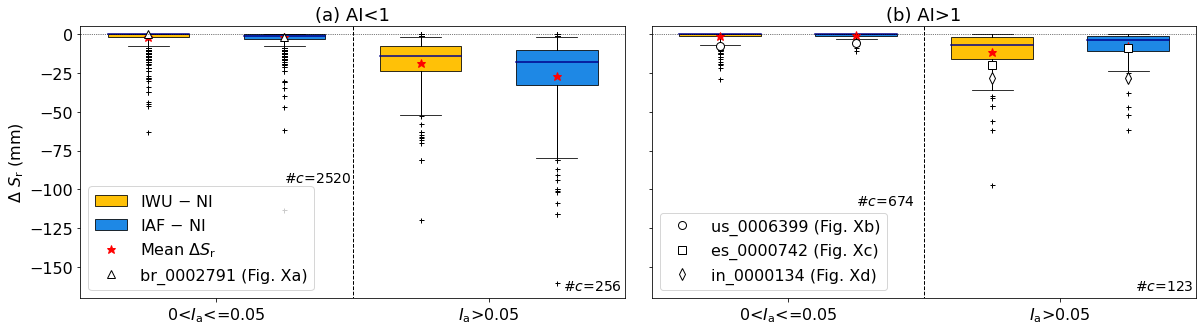

In [56]:
boxprops1 = dict(facecolor=c3,color="black",linewidth=0.8)
boxprops2 = dict(facecolor=c2,color="black",linewidth=0.8)
medianprops = dict(color="darkblue",linewidth=1.5)
meanpointprops = dict(marker='*', markeredgecolor='red',markerfacecolor='red',linestyle='None',markersize=9)
flierprops = dict(color='black',marker='+',markersize=5)
capprops = dict(linestyle='-', linewidth=0.8, color='Black')

ir2 = pd.read_csv(f'{work_dir}/data/irrigated_area/output/combined_ia.csv',index_col=0) 
ir = ir2.hi

# boxplot of Sr differences - ABS
fig = plt.figure(figsize=(20,5))

# ai<1
e_dfp = e_df[ai<1]
e_df0 = e_dfp[(ir>0)&(ir<=0.05)]
e_df1 = e_dfp[(ir>0.05)] 
ax = fig.add_subplot(121)
plt.subplots_adjust(wspace=0.05,hspace=0.3)
ax.boxplot(e_df0.iloc[:,0],positions=[1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.boxplot(e_df0.iloc[:,1],positions=[2],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
bp1=ax.boxplot(e_df1.iloc[:,0],positions=[3],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
bp2=ax.boxplot(e_df1.iloc[:,1],positions=[4],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.plot([1,2],e_df0.loc[ca1].values,marker='^',linestyle='None', markeredgecolor='black',markerfacecolor='white',markersize=8,zorder=1)
ax.set_ylim(-170,5)
ax.set_xlim(0.5,4.5)
ax.set_xticks([1.5,3.5])
ax.set_xticklabels(['0<$I_\mathrm{a}$<=0.05','$I_\mathrm{a}$>0.05'])
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=16)

ax.hlines(0,0,10,color='k',linestyle=':',linewidth=0.7)
ax.vlines(2.5,-200,20,color='k',linestyle='--',linewidth=1)
ax.annotate('#$c$='+str(e_df0.count()[0]),(2,-95),size=14)
ax.annotate('#$c$='+str(e_df1.count()[0]),(4.05,-165),size=14)
p1 = ax.plot(1,-200, marker='*', markeredgecolor='red',markerfacecolor='red',linestyle='None',markersize=9)
p2 = ax.plot(1,-200,marker='^',linestyle='None', markeredgecolor='black',markerfacecolor='white',markersize=8)
ax.legend([bp1["boxes"][0], bp2["boxes"][0],p1[0],p2[0]], ['IWU $-$ NI','IAF $-$ NI','Mean $\Delta$$S_\mathrm{r}$',f'{ca1} (Fig. Xa)'], loc='lower left',ncol=1,fontsize= 16)
ax.set_title('(a) AI<1',size=18)

# ai>1
e_dfp = e_df[ai>1]
e_df0 = e_dfp[(ir>0)&(ir<=0.05)]
e_df1 = e_dfp[(ir>0.05)] 
ax = fig.add_subplot(122)
plt.subplots_adjust(wspace=0.05,hspace=0.3)
ax.boxplot(e_df0.iloc[:,0],positions=[1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.boxplot(e_df0.iloc[:,1],positions=[2],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
bp1=ax.boxplot(e_df1.iloc[:,0],positions=[3],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
bp2=ax.boxplot(e_df1.iloc[:,1],positions=[4],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.plot([1,2],e_df0.loc[ca2].values,marker='o',linestyle='None', markeredgecolor='black',markerfacecolor='white',markersize=8,zorder=1)
ax.plot([3,4],e_df1.loc[ca3].values,marker='s',linestyle='None', markeredgecolor='black',markerfacecolor='white',markersize=8,zorder=1)
ax.plot([3,4],e_df1.loc[ca4].values,marker='d',linestyle='None', markeredgecolor='black',markerfacecolor='white',markersize=8,zorder=1)
ax.set_ylim(-170,5)
ax.set_xlim(0.5,4.5)
ax.set_xticks([1.5,3.5])
ax.set_xticklabels(['0<$I_\mathrm{a}$<=0.05','$I_\mathrm{a}$>0.05'])
ax.tick_params(axis='both', which='major', labelsize=16)
ax.axes.get_yaxis().set_ticklabels([])
ax.hlines(0,0,10,color='k',linestyle=':',linewidth=0.7)
ax.vlines(2.5,-200,20,color='k',linestyle='--',linewidth=1)
ax.annotate('#$c$='+str(e_df0.count()[0]),(2,-110),size=14)
ax.annotate('#$c$='+str(e_df1.count()[0]),(4.05,-165),size=14)
p1 = ax.plot(1,-200, marker='o',linestyle='None', markeredgecolor='black',markerfacecolor='white',markersize=8)
p2 = ax.plot(1,-200, marker='s',linestyle='None', markeredgecolor='black',markerfacecolor='white',markersize=8)
p3 = ax.plot(1,-200, marker='d',linestyle='None', markeredgecolor='black',markerfacecolor='white',markersize=8)
ax.legend([p1[0],p2[0],p3[0]], [f'{ca2} (Fig. Xb)',f'{ca3} (Fig. Xc)',f'{ca4} (Fig. Xd)'], loc='lower left',ncol=1,fontsize= 16)
ax.set_title('(b) AI>1',size=18)

fig.savefig(f'{fig_dir}/box_abs_diff_ai3.jpg', dpi=300, bbox_inches='tight')

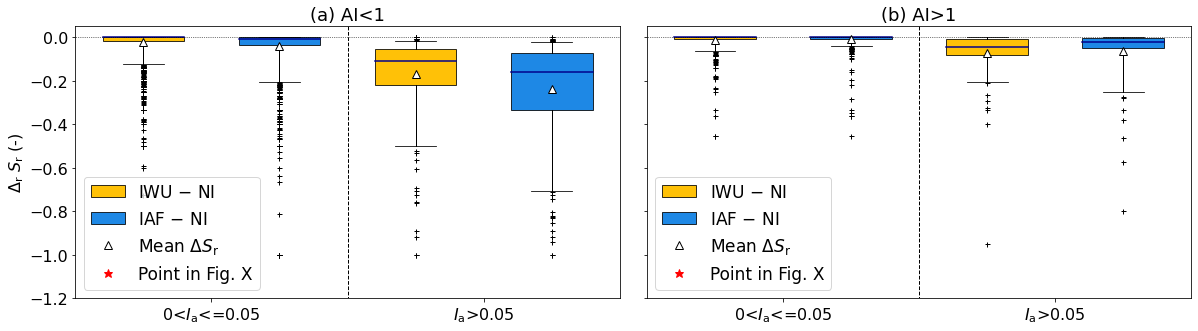

In [57]:
boxprops1 = dict(facecolor=c3,color="black",linewidth=0.8)
boxprops2 = dict(facecolor=c2,color="black",linewidth=0.8)
medianprops = dict(color="darkblue",linewidth=1.5)
meanpointprops = dict(marker='^', markeredgecolor='black',markerfacecolor='white',markersize=7.5)
flierprops = dict(color='black',marker='+',markersize=5)
capprops = dict(linestyle='-', linewidth=0.8, color='Black')

ir2 = pd.read_csv(f'{work_dir}/data/irrigated_area/output/combined_ia.csv',index_col=0) 
ir = ir2.hi

er_df = er_df.dropna()

# boxplot of Sr differences - ABS
fig = plt.figure(figsize=(20,5))

# ai<1
e_dfp = er_df[ai<1]
e_df0 = e_dfp[(ir>0)&(ir<=0.05)]
e_df1 = e_dfp[(ir>0.05)] 
ax = fig.add_subplot(121)
plt.subplots_adjust(wspace=0.05,hspace=0.3)
ax.boxplot(e_df0.iloc[:,0],positions=[1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.boxplot(e_df0.iloc[:,1],positions=[2],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
bp1=ax.boxplot(e_df1.iloc[:,0],positions=[3],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
bp2=ax.boxplot(e_df1.iloc[:,1],positions=[4],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.set_ylim(-1.2,0.05)
ax.set_xlim(0.5,4.5)
ax.set_xticks([1.5,3.5])
ax.set_xticklabels(['0<$I_\mathrm{a}$<=0.05','$I_\mathrm{a}$>0.05'])
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_ylabel('$\Delta_\mathrm{r}$ $S_\mathrm{r}$ (-)',size=16)

ax.hlines(0,0,10,color='k',linestyle=':',linewidth=0.7)
ax.vlines(2.5,-200,20,color='k',linestyle='--',linewidth=1)
ax.annotate('#$c$='+str(e_df0.count()[0]),(2,-165),size=14)
ax.annotate('#$c$='+str(e_df1.count()[0]),(4.05,-165),size=14)
p1 = ax.plot(1,-200, marker='^', markeredgecolor='black',markerfacecolor='white',linestyle = 'None',markersize=7.5)
p2 = ax.plot(1,-200,'r*',markersize=9)
ax.legend([bp1["boxes"][0], bp2["boxes"][0],p1[0],p2[0]], ['IWU $-$ NI','IAF $-$ NI','Mean $\Delta$$S_\mathrm{r}$','Point in Fig. X'], loc='lower left',ncol=1,fontsize= 17)
ax.set_title('(a) AI<1',size=18)

# ai>1
e_dfp = er_df[ai>1]
e_df0 = e_dfp[(ir>0)&(ir<=0.05)]
e_df1 = e_dfp[(ir>0.05)] 
ax = fig.add_subplot(122)
plt.subplots_adjust(wspace=0.05,hspace=0.3)
ax.boxplot(e_df0.iloc[:,0],positions=[1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.boxplot(e_df0.iloc[:,1],positions=[2],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
bp1=ax.boxplot(e_df1.iloc[:,0],positions=[3],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
bp2=ax.boxplot(e_df1.iloc[:,1],positions=[4],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.set_ylim(-1.2,0.05)
ax.set_xlim(0.5,4.5)
ax.set_xticks([1.5,3.5])
ax.set_xticklabels(['0<$I_\mathrm{a}$<=0.05','$I_\mathrm{a}$>0.05'])
ax.tick_params(axis='both', which='major', labelsize=16)
ax.axes.get_yaxis().set_ticklabels([])
ax.hlines(0,0,10,color='k',linestyle=':',linewidth=0.7)
ax.vlines(2.5,-200,20,color='k',linestyle='--',linewidth=1)
ax.annotate('#$c$='+str(e_df0.count()[0]),(2,-165),size=14)
ax.annotate('#$c$='+str(e_df1.count()[0]),(4.05,-165),size=14)
p1 = ax.plot(1,-200, marker='^', markeredgecolor='black',markerfacecolor='white',linestyle = 'None',markersize=7.5)
p2 = ax.plot(1,-200,'r*',markersize=9)
ax.legend([bp1["boxes"][0], bp2["boxes"][0],p1[0],p2[0]], ['IWU $-$ NI','IAF $-$ NI','Mean $\Delta$$S_\mathrm{r}$','Point in Fig. X'], loc='lower left',ncol=1,fontsize= 17)
ax.set_title('(b) AI>1',size=18)

fig.savefig(f'{fig_dir}/box_rel_diff_ai3.jpg', dpi=300, bbox_inches='tight')

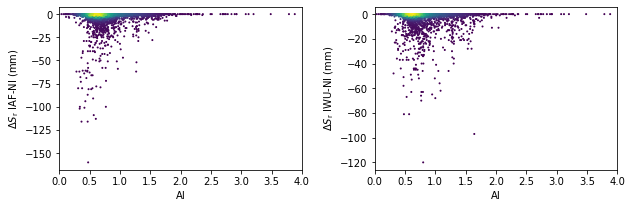

In [58]:
e_df = e_df.dropna()

cc = pd.read_csv(f'{work_dir}/output/catchment_characteristics/catchment_characteristics_gswp-p_gleam-ep_gswp-t.csv',index_col=0)
cc.ai = 1/cc.ai
e_df['ai'] = cc.ai

e_df = e_df.dropna()
x = e_df['ai']
y = e_df['f0_fopt']

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig = plt.figure(figsize=(10,3))
plt.subplots_adjust(wspace=0.3)
ax = fig.add_subplot(121)
ax.scatter(x,y,c=z,s=1)
ax.set_ylabel('$\Delta$$S_\mathrm{r}$ IAF-NI (mm)')
ax.set_xlabel('AI')
ax.set_xlim(0,4)

e_df = e_df.dropna()

cc = pd.read_csv(f'{work_dir}/output/catchment_characteristics/catchment_characteristics_gswp-p_gleam-ep_gswp-t.csv',index_col=0)
cc.ai = 1/cc.ai
e_df['ai'] = cc.ai

e_df = e_df.dropna()
x = e_df['ai']
y = e_df['f0_fiwu']

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

ax = fig.add_subplot(122)
ax.scatter(x,y,c=z,s=1)
ax.set_ylabel('$\Delta$$S_\mathrm{r}$ IWU-NI (mm)')
ax.set_xlabel('AI')
ax.set_xlim(0,4)

fig.savefig(f'{fig_dir}/dsr_vs_ai.jpg', dpi=300, bbox_inches='tight')

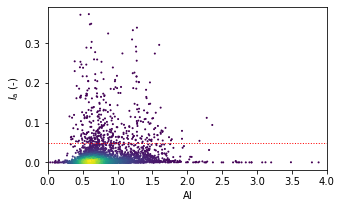

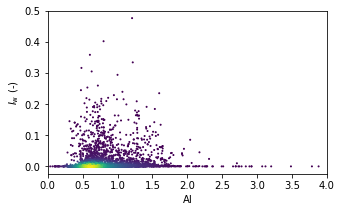

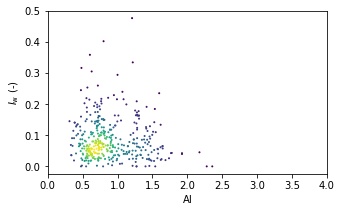

In [70]:
cc = pd.read_csv(f'{work_dir}/output/catchment_characteristics/catchment_characteristics_gswp-p_gleam-ep_gswp-t.csv',index_col=0)
cc.ai = 1/cc.ai
e_df['ai'] = cc.ai

ir2 = pd.read_csv(f'{work_dir}/data/irrigated_area/output/combined_ia.csv',index_col=0) 
ir = ir2.hi
e_df['ir'] = ir2.hi

iwu = pd.read_csv(f'{work_dir}/output/irrigation/mean_irrigation_all_catchments2.csv',index_col=0) # read iwu data
e_df['iwu'] = iwu['iwu_mean_mmday']

e_df = e_df.dropna()
x = e_df['ai']
y = e_df['ir']

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(111)
ax.scatter(x,y,c=z,s=1)
ax.hlines(0.05,0,4,color='r',linestyle=':',linewidth=1)
ax.set_ylabel('$I_\mathrm{a}$ (-)')
ax.set_xlabel('AI')
ax.set_xlim(0,4)
fig.savefig(f'{fig_dir}/ia_vs_ai.jpg', dpi=300, bbox_inches='tight')

x = e_df['ai']
y = e_df['iwu']

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(111)
ax.scatter(x,y,c=z,s=1)
# ax.hlines(0.05,0,4,color='r',linestyle=':',linewidth=1)
ax.set_ylabel('$I_\mathrm{w}$ (-)')
ax.set_xlabel('AI')
ax.set_xlim(0,4)
fig.savefig(f'{fig_dir}/iw_vs_ai.jpg', dpi=300, bbox_inches='tight')




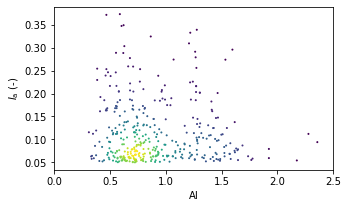

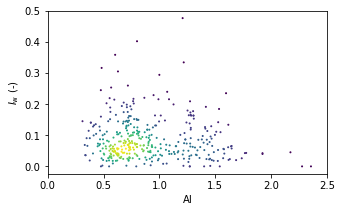

In [73]:
x = e_df.ai[e_df.ir>0.05]
y = e_df.ir[e_df.ir>0.05]

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(111)
ax.scatter(x,y,c=z,s=1)
ax.set_ylabel('$I_\mathrm{a}$ (-)')
ax.set_xlabel('AI')
ax.set_xlim(0,2.5)
fig.savefig(f'{fig_dir}/ia2_vs_ai.jpg', dpi=300, bbox_inches='tight')


x = e_df.ai[e_df.ir>0.05]
y = e_df.iwu[e_df.ir>0.05]

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(111)
ax.scatter(x,y,c=z,s=1)
# ax.hlines(0.05,0,4,color='r',linestyle=':',linewidth=1)
ax.set_ylabel('$I_\mathrm{w}$ (-)')
ax.set_xlabel('AI')
ax.set_xlim(0,2.5)
fig.savefig(f'{fig_dir}/iw2_vs_ai.jpg', dpi=300, bbox_inches='tight')

Text(0, 0.5, '$I_\\mathrm{a}$ or $I_\\mathrm{w}$')

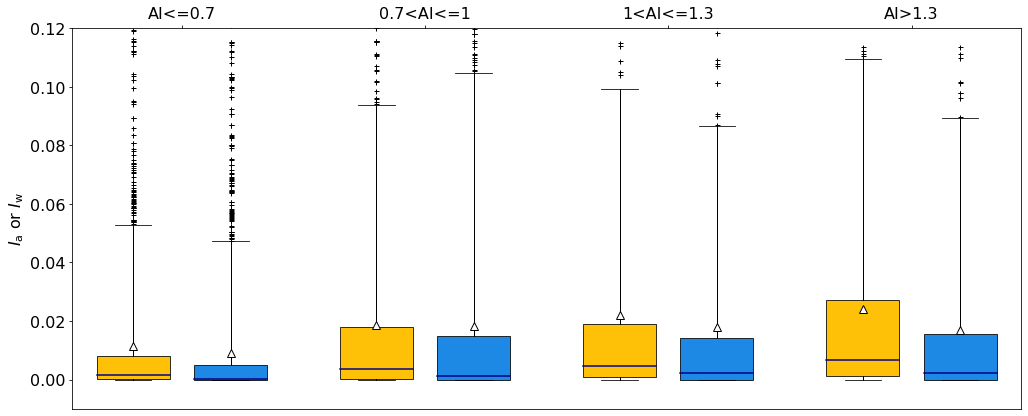

In [88]:
#abs - IA bins
ai = e_df.ai

e_df0 = e_df[(ai<0.7)]
e_df1 = e_df[(ai>0.7)&(ai<=1)]
e_df2 = e_df[(ai>1)&(ai<=1.3)]
e_df3 = e_df[(ai>1.3)]

# boxplot of Sr differences - ABS
fig = plt.figure(figsize=(17,7))
ax = fig.add_subplot(111)
plt.subplots_adjust(wspace=0.05)
ax.boxplot(e_df0.iloc[:,3],positions=[1.1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.boxplot(e_df0.iloc[:,4],positions=[1.9],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)

ax.boxplot(e_df1.iloc[:,3],positions=[3.1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.boxplot(e_df1.iloc[:,4],positions=[3.9],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)

ax.boxplot(e_df2.iloc[:,3],positions=[5.1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.boxplot(e_df2.iloc[:,4],positions=[5.9],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)

bp1=ax.boxplot(e_df3.iloc[:,3],positions=[7.1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
bp2=ax.boxplot(e_df3.iloc[:,4],positions=[7.9],widths=0.6,whis=[5,95],patch_artist=True,showmeans=True,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)

# p3 = ax.plot(1,-200, marker='^', markeredgecolor='black',markerfacecolor='white',linestyle = 'None',markersize=7.5)
# # p2 = ax.plot(1,-200,'r*',markersize=9)

ax.set_ylim(-0.01,0.12)
# ax.set_xlim(0.5,8.5)
ax.set_xticks([1.5,3.5,5.5,7.5])
# # ax.set_yticks([0,-20,-40,-60,-80,-100])
# # ax.set_yticklabels([0,-20,-40,-60,-80,'< -100'])
ax.set_xticklabels(['AI<=0.7','0.7<AI<=1','1<AI<=1.3','AI>1.3'],size=18)
ax.xaxis.set_tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_ylabel('$I_\mathrm{a}$ or $I_\mathrm{w}$',size=16)

# ax.hlines(0,0,10,color='k',linestyle=':',linewidth=0.7)
# ax.hlines(-100,0,10,color='k',linestyle=':',linewidth=0.7)
# ax.vlines(2.5,-200,20,color='k',linestyle='--',linewidth=1)
# ax.vlines(4.5,-200,20,color='k',linestyle='--',linewidth=1)
# ax.vlines(6.5,-200,20,color='k',linestyle='--',linewidth=1)


In [95]:

d = pd.DataFrame(index=['IA','IW'])
d['med0']=np.round(e_df0.iloc[:,3:5].median(),4).values
d['mean0']=np.round(e_df0.iloc[:,3:5].mean(),4).values
d['std0']=np.round(e_df0.iloc[:,3:5].std(),4).values

d['med1']=np.round(e_df1.iloc[:,3:5].median(),4).values
d['mean1']=np.round(e_df1.iloc[:,3:5].mean(),4).values
d['std1']=np.round(e_df1.iloc[:,3:5].std(),4).values

d['med2']=np.round(e_df2.iloc[:,3:5].median(),4).values
d['mean2']=np.round(e_df2.iloc[:,3:5].mean(),4).values
d['std2']=np.round(e_df2.iloc[:,3:5].std(),4).values

d['med3']=np.round(e_df3.iloc[:,3:5].median(),4).values
d['mean3']=np.round(e_df3.iloc[:,3:5].mean(),4).values
d['std3']=np.round(e_df3.iloc[:,3:5].std(),4).values

d

,med0,mean0,std0,med1,mean1,std1,med2,mean2,std2,med3,mean3,std3
IA,0.0015,0.0115,0.0334,0.0035,0.0186,0.0371,0.0047,0.0221,0.0479,0.0068,0.0239,0.0406
IW,0.0001,0.0091,0.0272,0.0011,0.0182,0.0396,0.0022,0.0179,0.0423,0.0022,0.0169,0.0341


In [92]:
e_df0.iloc[:,3:5]

,ir,iwu
de_0000760,0.002392,0.000371
br_0000837,0.005775,0.003415
br_0001950,0.004872,0.002152
br_0002844,0.005220,0.002511
br_0002050,0.011634,0.015946
...,...,...
fr_0000804,0.003098,0.005536
de_0000538,0.000000,0.000000
gb_0000177,0.000000,0.000000
de_0000348,0.000000,0.000000


In [ ]:
cc = pd.read_csv(f'{work_dir}/output/catchment_characteristics/catchment_characteristics_gswp-p_gleam-ep_gswp-t.csv',index_col=0)
cc.ai = 1/cc.ai
sr_df['ai'] = cc.ai

e_df = e_df.dropna()
x = sr_df['ai']
y = sr_df['sr_2_f0']

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.scatter(x,y,c=z,s=1)
ax.set_ylabel('$S_\mathrm{r}$ NI (mm)')
ax.set_xlabel('AI')
ax.set_xlim(0,4)
ax.set_ylim(0,850)
fig.savefig(f'{fig_dir}/sr_vs_ai.jpg', dpi=300, bbox_inches='tight')

In [58]:
np.corrcoef(x,y)

array([[1.        , 0.13959907],
       [0.13959907, 1.        ]])